In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import linregress

In [2]:
df = pd.read_csv("Demand_All.csv")

In [3]:
df.head()

,UTC,Eastern,Year,OrdDay,OrdHr,Weekday,Month,Day,HourEnd,DST,Concord,Greenwood,NewRiver,KingsMountain,Winterville,Total,Peak
0,2015-01-01 06:00:00+00:00,2015-01-01 01:00:00-05:00,2015,1,1,4,1,1,1,0,97098.0,33667.0,27333,14393.0,8060.0,180550,0
1,2015-01-01 07:00:00+00:00,2015-01-01 02:00:00-05:00,2015,1,2,4,1,1,2,0,96620.0,33223.0,27048,14306.0,8307.0,179504,0
2,2015-01-01 08:00:00+00:00,2015-01-01 03:00:00-05:00,2015,1,3,4,1,1,3,0,96084.0,32849.0,27008,14270.0,8174.0,178385,0
3,2015-01-01 09:00:00+00:00,2015-01-01 04:00:00-05:00,2015,1,4,4,1,1,4,0,95829.0,33053.0,26821,14285.0,8333.0,178320,0
4,2015-01-01 10:00:00+00:00,2015-01-01 05:00:00-05:00,2015,1,5,4,1,1,5,0,98489.0,33686.0,26924,14450.0,8396.0,181946,0


In [4]:
data_type = df.dtypes
data_type

UTC               object
Eastern           object
Year               int64
OrdDay             int64
OrdHr              int64
Weekday            int64
Month              int64
Day                int64
HourEnd            int64
DST                int64
Concord          float64
Greenwood        float64
NewRiver           int64
KingsMountain    float64
Winterville      float64
Total              int64
Peak               int64
dtype: object

### Checking for Null Values (They start at row 27964 and go to 35065)

In [5]:
nan_count = df.isna().sum()
nan_count

UTC                 0
Eastern             0
Year                0
OrdDay              0
OrdHr               0
Weekday             0
Month               0
Day                 0
HourEnd             0
DST                 0
Concord          7102
Greenwood        7102
NewRiver            0
KingsMountain    7102
Winterville      7102
Total               0
Peak                0
dtype: int64

In [6]:
# Checking bell curve to see if filling in missing values with mean is appropriate

#creating a new data frame with just "year" and "concord"
concord_data = df[['Year', 'Concord']]

concord_data.head()

,Year,Concord
0,2015,97098.0
1,2015,96620.0
2,2015,96084.0
3,2015,95829.0
4,2015,98489.0


In [7]:
greenwood_data = df[['Year', 'Greenwood']]

greenwood_data.head()

,Year,Greenwood
0,2015,33667.0
1,2015,33223.0
2,2015,32849.0
3,2015,33053.0
4,2015,33686.0


In [8]:
KingsMountain_data = df[['Year', 'KingsMountain']]

KingsMountain_data.head()

,Year,KingsMountain
0,2015,14393.0
1,2015,14306.0
2,2015,14270.0
3,2015,14285.0
4,2015,14450.0


In [9]:
Winterville_data = df[['Year', 'Winterville']]

Winterville_data.head()

,Year,Winterville
0,2015,8060.0
1,2015,8307.0
2,2015,8174.0
3,2015,8333.0
4,2015,8396.0


In [10]:
# Filling in Missing values with the mean
df['Concord'] = df['Concord'].fillna(df['Concord'].mean())
df['Greenwood'] = df['Greenwood'].fillna(df['Greenwood'].mean())
df['KingsMountain'] = df['KingsMountain'].fillna(df['KingsMountain'].mean())
df['Winterville'] = df['Winterville'].fillna(df['Winterville'].mean())

In [11]:
nan_count2 = df.isna().sum()
nan_count2

UTC              0
Eastern          0
Year             0
OrdDay           0
OrdHr            0
Weekday          0
Month            0
Day              0
HourEnd          0
DST              0
Concord          0
Greenwood        0
NewRiver         0
KingsMountain    0
Winterville      0
Total            0
Peak             0
dtype: int64

In [12]:
data_type = df.dtypes
data_type

UTC               object
Eastern           object
Year               int64
OrdDay             int64
OrdHr              int64
Weekday            int64
Month              int64
Day                int64
HourEnd            int64
DST                int64
Concord          float64
Greenwood        float64
NewRiver           int64
KingsMountain    float64
Winterville      float64
Total              int64
Peak               int64
dtype: object

In [13]:
df['Concord'] = df['Concord'].astype('int64')
df['Greenwood'] = df['Greenwood'].astype('int64')
df['KingsMountain'] = df['KingsMountain'].astype('int64')
df['Winterville'] = df['Winterville'].astype('int64')

In [14]:
data_type = df.dtypes
data_type

UTC              object
Eastern          object
Year              int64
OrdDay            int64
OrdHr             int64
Weekday           int64
Month             int64
Day               int64
HourEnd           int64
DST               int64
Concord           int64
Greenwood         int64
NewRiver          int64
KingsMountain     int64
Winterville       int64
Total             int64
Peak              int64
dtype: object

### Discovering which region is the 'Gorilla' (This is the output with the missing values filled in with the mean)

In [15]:
Concord_sum = df['Concord'].sum()
print("Concord total power usage:", Concord_sum)

Greenwood_sum = df['Greenwood'].sum()
print("Greenwood total power usage: ", Greenwood_sum)

NewRiver_sum = df['NewRiver'].sum()
print("NewRiver total power usage: ", NewRiver_sum)

KingsMountain_sum = df['KingsMountain'].sum()
print("KingsMountain total power usage: ", KingsMountain_sum)

Winterville_sum = df['Winterville'].sum()
print("Winterville total power usage: ", Winterville_sum)

Concord total power usage: 5587949911
Greenwood total power usage:  1873460604
NewRiver total power usage:  1266075128
KingsMountain total power usage:  902715964
Winterville total power usage:  324750027


<AxesSubplot:xlabel='index', ylabel='Total Power'>

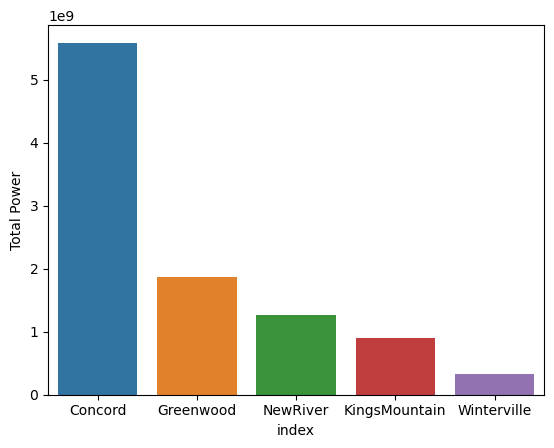

In [16]:
total_power_by_region = df[['Concord', 'Greenwood', 'NewRiver', 'KingsMountain', 'Winterville']].sum()

total_power_df = total_power_by_region.reset_index(name='Total Power')

sns.barplot(x='index', y='Total Power', data=total_power_df)

In [17]:
totals_power_df = pd.DataFrame({
    "Region": ['Concord', 'Greenwood', 'NewRiver', 'KingsMountain', 'Winterville'],
    "Total Power": [Concord_sum, Greenwood_sum, NewRiver_sum, KingsMountain_sum, Winterville_sum]})

total_power_df_sorted = total_power_df.sort_values(by ='Total Power', ascending = False)

total_power_df_sorted

,index,Total Power
0,Concord,5587949911
1,Greenwood,1873460604
2,NewRiver,1266075128
3,KingsMountain,902715964
4,Winterville,324750027


### Use 'Hour End' and 'Month' to see which hour of January had the most power usage by NewRiver in 2015

In [18]:
# All of January Data

Jan_df = df[(df['Month'] == 1)]
Jan_df

,UTC,Eastern,Year,OrdDay,OrdHr,Weekday,Month,Day,HourEnd,DST,Concord,Greenwood,NewRiver,KingsMountain,Winterville,Total,Peak
0,2015-01-01 06:00:00+00:00,2015-01-01 01:00:00-05:00,2015,1,1,4,1,1,1,0,97098,33667,27333,14393,8060,180550,0
1,2015-01-01 07:00:00+00:00,2015-01-01 02:00:00-05:00,2015,1,2,4,1,1,2,0,96620,33223,27048,14306,8307,179504,0
2,2015-01-01 08:00:00+00:00,2015-01-01 03:00:00-05:00,2015,1,3,4,1,1,3,0,96084,32849,27008,14270,8174,178385,0
3,2015-01-01 09:00:00+00:00,2015-01-01 04:00:00-05:00,2015,1,4,4,1,1,4,0,95829,33053,26821,14285,8333,178320,0
4,2015-01-01 10:00:00+00:00,2015-01-01 05:00:00-05:00,2015,1,5,4,1,1,5,0,98489,33686,26924,14450,8396,181946,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44563,2020-02-01 01:00:00+00:00,2020-01-31 20:00:00-05:00,2020,31,740,5,1,31,20,0,113208,42034,31668,20362,7303,214574,0
44564,2020-02-01 02:00:00+00:00,2020-01-31 21:00:00-05:00,2020,31,741,5,1,31,21,0,109198,40802,30294,19678,7341,207313,0
44565,2020-02-01 03:00:00+00:00,2020-01-31 22:00:00-05:00,2020,31,742,5,1,31,22,0,103821,39485,28952,18814,7226,198297,0
44566,2020-02-01 04:00:00+00:00,2020-01-31 23:00:00-05:00,2020,31,743,5,1,31,23,0,97146,37034,27495,17582,6911,186169,0


### January 2015 Total Power Usage

In [19]:
Jan_2015 = df[(df['Month'] == 1) & (df['Year'] == 2015)]

Jan_2015_NewRiver_Total = Jan_2015.groupby('HourEnd')['NewRiver'].sum()

Jan_2015_NewRiver_Total

HourEnd
1      830939
2      806077
3      791975
4      788556
5      800197
6      833628
7      899553
8      968696
9     1005189
10    1019562
11    1020847
12    1005319
13     981670
14     963095
15     947010
16     939390
17     939369
18     974770
19    1012672
20    1007196
21     988856
22     954404
23     911466
24     866841
Name: NewRiver, dtype: int64

In [20]:
df_result_Jan_2015 = Jan_2015_NewRiver_Total.reset_index(name ='TotalPowerUsage')

#df_result_Jan_2015

df_Jan_2015_sorted = df_result_Jan_2015.sort_values(by = 'TotalPowerUsage', ascending = False)
df_Jan_2015_sorted

,HourEnd,TotalPowerUsage
10,11,1020847
9,10,1019562
18,19,1012672
19,20,1007196
11,12,1005319
8,9,1005189
20,21,988856
12,13,981670
17,18,974770
7,8,968696


### January Hourly Total Power Usage

In [21]:
Jan_NewRiver = df[(df['Month'] == 1)]

Jan_NewRiver_Total = Jan_NewRiver.groupby('HourEnd')['NewRiver'].sum()

Jan_NewRiver_Total

HourEnd
1     4877637
2     4741598
3     4671303
4     4653754
5     4726696
6     4917476
7     5327374
8     5719311
9     5939928
10    6032503
11    6041263
12    5954354
13    5846188
14    5733195
15    5631853
16    5566556
17    5578212
18    5767909
19    5981854
20    5941348
21    5834807
22    5631257
23    5366839
24    5109415
Name: NewRiver, dtype: int64

In [22]:
## Total electricity usage for each hour in January

df_result_Jan = Jan_NewRiver_Total.reset_index(name = 'TotalPowerUsage')
df_Jan_sorted = df_result_Jan.sort_values(by = 'TotalPowerUsage', ascending = False)

df_Jan_sorted

,HourEnd,TotalPowerUsage
10,11,6041263
9,10,6032503
18,19,5981854
11,12,5954354
19,20,5941348
8,9,5939928
12,13,5846188
20,21,5834807
17,18,5767909
13,14,5733195


### Average electricity usage for each hour in January in descending order

In [23]:
Jan_NewRiver_Avg = Jan_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Jan = Jan_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_Jan_sorted = df_result_Avg_Jan.sort_values(by ='AvgTotalPowerUsage', ascending = False)

df_Avg_Jan_sorted

,HourEnd,AvgTotalPowerUsage
10,11,32479.91
9,10,32432.81
18,19,32160.51
11,12,32012.66
19,20,31942.73
8,9,31935.10
12,13,31431.12
20,21,31369.93
17,18,31010.26
13,14,30823.63


In [24]:
# ADDED TIME FRAME TO MAKE IT MORE INTUITIVE - THIS IS THE AVERAGE POWER USAGE LEADING UP TO THAT HOUR FOR EACH HOUR
# EX: HOUR END (1) = 26233.85 --> FROM MIDNIGHT TO 1:00 AM


df_Avg_Jan_sorted['Time Frame'] = df_Avg_Jan_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Jan_sorted['Time Frame'] = pd.to_datetime(df_Avg_Jan_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Jan_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,32479.91,11:00:00
9,10,32432.81,10:00:00
18,19,32160.51,19:00:00
11,12,32012.66,12:00:00
19,20,31942.73,20:00:00
8,9,31935.10,09:00:00
12,13,31431.12,13:00:00
20,21,31369.93,21:00:00
17,18,31010.26,18:00:00
13,14,30823.63,14:00:00


In [25]:
Jan_max = df_Avg_Jan_sorted['AvgTotalPowerUsage'].idxmax()
Jan_max_df = df_Avg_Jan_sorted.loc[[Jan_max]]

Jan_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,32479.91,11:00:00


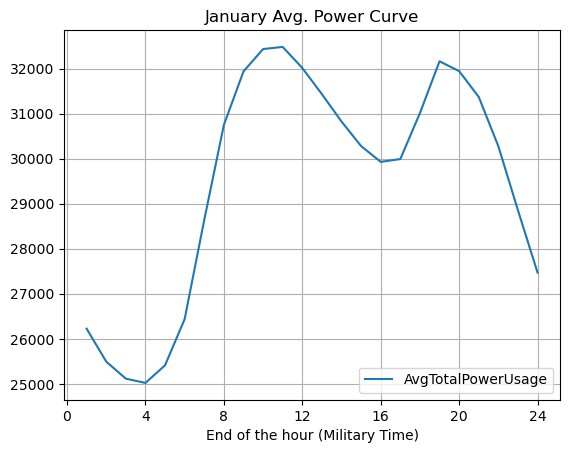

In [26]:
line_Jan_sorted = df_result_Avg_Jan.sort_values(by = 'HourEnd', ascending = True)
line_Jan_sorted.set_index('HourEnd', inplace = True)

line_plot_Jan = df_result_Avg_Jan.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')
#line_plot_Jan = line_Jan_sorted.plot.line(y='AvgTotalPowerUsage')

plt.title("January Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### February Total and Average

In [27]:
Feb_NewRiver = df[(df['Month'] == 2)]

Feb_NewRiver_Total = Feb_NewRiver.groupby('HourEnd')['NewRiver'].sum()

Feb_NewRiver_Total

HourEnd
1     4230578
2     4069790
3     3984407
4     3958556
5     4015610
6     4199592
7     4602717
8     4952400
9     5210838
10    5312829
11    5347523
12    5290742
13    5211663
14    5118994
15    5030838
16    4967112
17    4951879
18    5019501
19    5247533
20    5266013
21    5159570
22    4972692
23    4721096
24    4448769
Name: NewRiver, dtype: int64

In [28]:
df_result_Feb = Feb_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_Feb_sorted = df_result_Feb.sort_values(by = 'TotalPowerUsage', ascending = False)

df_Feb_sorted

,HourEnd,TotalPowerUsage
10,11,5347523
9,10,5312829
11,12,5290742
19,20,5266013
18,19,5247533
12,13,5211663
8,9,5210838
20,21,5159570
13,14,5118994
14,15,5030838


In [29]:
Feb_NewRiver_Avg = Feb_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Feb = Feb_NewRiver_Avg.reset_index(name ='AvgTotalPowerUsage')
df_Avg_Feb_sorted = df_result_Avg_Feb.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_Feb_sorted

,HourEnd,AvgTotalPowerUsage
10,11,31456.02
9,10,31251.94
11,12,31122.01
19,20,30976.55
18,19,30867.84
12,13,30656.84
8,9,30651.99
20,21,30350.41
13,14,30111.73
14,15,29593.16


In [30]:
df_Avg_Feb_sorted['Time Frame'] = df_Avg_Feb_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Feb_sorted['Time Frame'] = pd.to_datetime(df_Avg_Feb_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Feb_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,31456.02,11:00:00
9,10,31251.94,10:00:00
11,12,31122.01,12:00:00
19,20,30976.55,20:00:00
18,19,30867.84,19:00:00
12,13,30656.84,13:00:00
8,9,30651.99,09:00:00
20,21,30350.41,21:00:00
13,14,30111.73,14:00:00
14,15,29593.16,15:00:00


In [31]:
Feb_max = df_Avg_Feb_sorted['AvgTotalPowerUsage'].idxmax()
Feb_max_df = df_Avg_Feb_sorted.loc[[Feb_max]]

Feb_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,31456.02,11:00:00


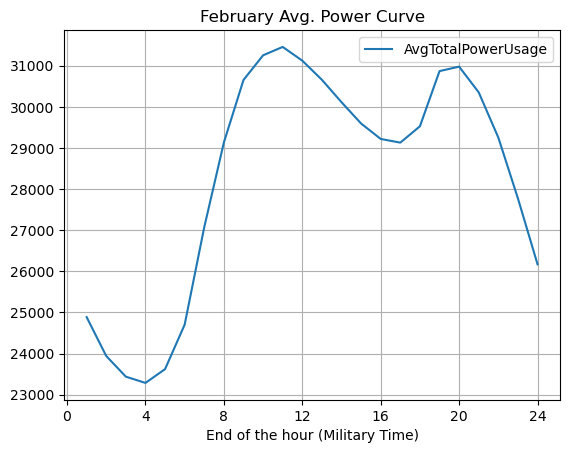

In [32]:
line_Feb_sorted = df_result_Avg_Feb.sort_values(by = 'HourEnd', ascending = True)
line_Feb_sorted.set_index('HourEnd', inplace = True)

line_plot_Feb = df_result_Avg_Feb.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("February Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### March Total and Average

In [33]:
March_NewRiver = df[(df['Month'] == 3)]

March_NewRiver_Total = March_NewRiver.groupby('HourEnd')['NewRiver'].sum()

df_result_March = March_NewRiver_Total.reset_index(name = 'TotalPowerUsage')
df_March_sorted = df_result_March.sort_values(by ='TotalPowerUsage', ascending = False)

df_March_sorted

,HourEnd,TotalPowerUsage
10,11,5092940
11,12,5059432
9,10,5043124
12,13,4981787
8,9,4925356
13,14,4892627
20,21,4825025
14,15,4799177
19,20,4753232
15,16,4713838


In [34]:
March_NewRiver_Avg = March_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_March = March_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_March_sorted = df_result_Avg_March.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_March_sorted

,HourEnd,AvgTotalPowerUsage
10,11,27381.40
11,12,27201.25
9,10,27113.57
12,13,26783.80
8,9,26480.41
13,14,26304.45
20,21,25940.99
14,15,25802.03
19,20,25555.01
15,16,25343.22


In [35]:
df_Avg_March_sorted['Time Frame'] = df_Avg_March_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_March_sorted['Time Frame'] = pd.to_datetime(df_Avg_March_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_March_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,27381.40,11:00:00
11,12,27201.25,12:00:00
9,10,27113.57,10:00:00
12,13,26783.80,13:00:00
8,9,26480.41,09:00:00
13,14,26304.45,14:00:00
20,21,25940.99,21:00:00
14,15,25802.03,15:00:00
19,20,25555.01,20:00:00
15,16,25343.22,16:00:00


In [36]:
March_max = df_Avg_March_sorted['AvgTotalPowerUsage'].idxmax()
March_max_df = df_Avg_March_sorted.loc[[March_max]]

March_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,27381.4,11:00:00


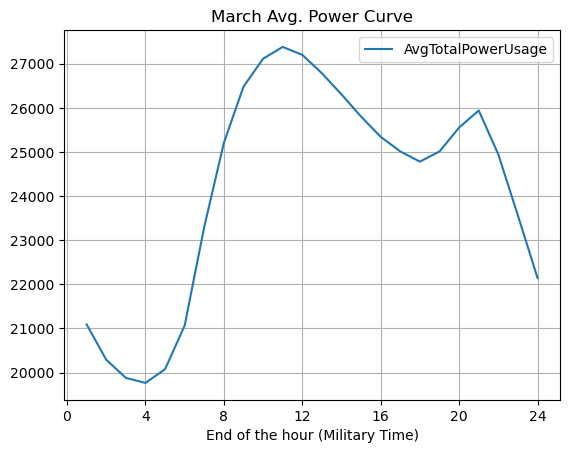

In [37]:
line_March_sorted = df_result_Avg_March.sort_values(by = 'HourEnd', ascending = True)
line_March_sorted.set_index('HourEnd', inplace=True)

line_plot_March = df_result_Avg_March.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("March Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### April Total and Average

In [38]:
April_NewRiver = df[(df['Month'] == 4)]

April_NewRiver_Total = April_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# April_NewRiver_Total

df_result_April = April_NewRiver_Total.reset_index(name = 'TotalPowerUsage')
df_April_sorted = df_result_April.sort_values(by = 'TotalPowerUsage', ascending = False)

df_April_sorted

,HourEnd,TotalPowerUsage
11,12,4435441
12,13,4420712
10,11,4406145
13,14,4386029
14,15,4351748
15,16,4295107
9,10,4279043
20,21,4256999
16,17,4239153
17,18,4168634


In [39]:
April_NewRiver_Avg = April_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_April = April_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_April_sorted = df_result_Avg_April.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_April_sorted

,HourEnd,AvgTotalPowerUsage
11,12,24641.34
12,13,24559.51
10,11,24478.58
13,14,24366.83
14,15,24176.38
15,16,23861.71
9,10,23772.46
20,21,23649.99
16,17,23550.85
17,18,23159.08


In [40]:
df_Avg_April_sorted['Time Frame'] = df_Avg_April_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_April_sorted['Time Frame'] = pd.to_datetime(df_Avg_April_sorted['Time Frame'], format ='%H:%M').dt.time

df_Avg_April_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
11,12,24641.34,12:00:00
12,13,24559.51,13:00:00
10,11,24478.58,11:00:00
13,14,24366.83,14:00:00
14,15,24176.38,15:00:00
15,16,23861.71,16:00:00
9,10,23772.46,10:00:00
20,21,23649.99,21:00:00
16,17,23550.85,17:00:00
17,18,23159.08,18:00:00


In [41]:
April_max = df_Avg_April_sorted['AvgTotalPowerUsage'].idxmax()
April_max_df = df_Avg_April_sorted.loc[[April_max]]

April_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
11,12,24641.34,12:00:00


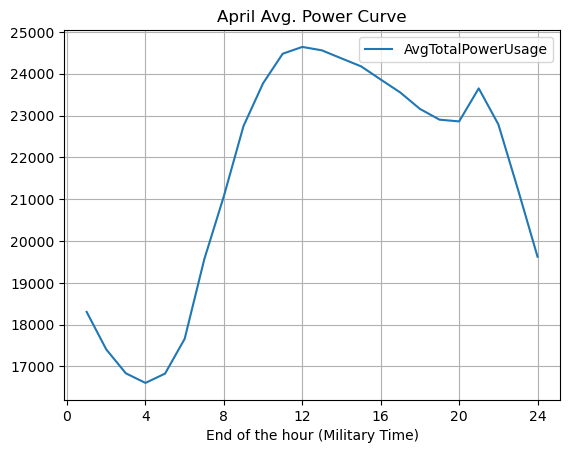

In [42]:
line_April_sorted = df_result_Avg_April.sort_values(by = 'HourEnd', ascending = True)
line_April_sorted.set_index('HourEnd', inplace = True)

line_plot_April = df_result_Avg_April.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("April Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### May Total and Average

In [43]:
May_NewRiver = df[(df['Month'] == 5)]

May_NewRiver_Total = May_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# May_NewRiver_Total

df_result_May = May_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_May_sorted = df_result_May.sort_values(by = 'TotalPowerUsage', ascending = False)

df_May_sorted

,HourEnd,TotalPowerUsage
13,14,4537118
14,15,4536494
12,13,4524032
15,16,4500636
11,12,4485113
16,17,4450890
10,11,4372849
17,18,4331935
18,19,4222954
9,10,4156285


In [44]:
May_NewRiver_Avg = May_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_May = May_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_May_sorted = df_result_Avg_May.sort_values(by ='AvgTotalPowerUsage', ascending = False)

df_Avg_May_sorted

,HourEnd,AvgTotalPowerUsage
13,14,24393.11
14,15,24389.75
12,13,24322.75
15,16,24196.97
11,12,24113.51
16,17,23929.52
10,11,23509.94
17,18,23289.97
18,19,22704.05
9,10,22345.62


In [45]:
df_Avg_May_sorted['Time Frame'] = df_Avg_May_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_May_sorted['Time Frame'] = pd.to_datetime(df_Avg_May_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_May_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
13,14,24393.11,14:00:00
14,15,24389.75,15:00:00
12,13,24322.75,13:00:00
15,16,24196.97,16:00:00
11,12,24113.51,12:00:00
16,17,23929.52,17:00:00
10,11,23509.94,11:00:00
17,18,23289.97,18:00:00
18,19,22704.05,19:00:00
9,10,22345.62,10:00:00


In [46]:
May_max = df_Avg_May_sorted['AvgTotalPowerUsage'].idxmax()
May_max_df = df_Avg_May_sorted.loc[[May_max]]

May_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
13,14,24393.11,14:00:00


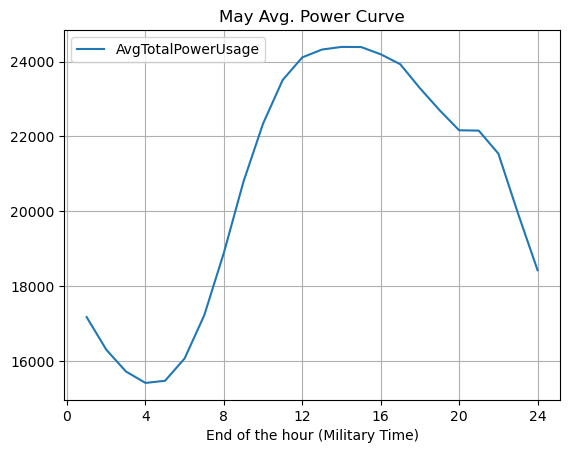

In [47]:
line_May_sorted = df_result_Avg_May.sort_values(by = 'HourEnd', ascending = True)
line_May_sorted.set_index('HourEnd', inplace=True)

line_plot_May = df_result_Avg_May.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("May Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### June Total and Average

In [48]:
June_NewRiver = df[(df['Month'] == 6)]

June_NewRiver_Total = June_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# June_NewRiver_Total

df_result_June = June_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_June_sorted = df_result_June.sort_values(by = 'TotalPowerUsage', ascending = False)

df_June_sorted

,HourEnd,TotalPowerUsage
14,15,4775708
15,16,4751685
13,14,4750091
16,17,4713692
12,13,4710142
11,12,4633166
17,18,4580174
10,11,4475726
18,19,4434029
19,20,4284271


In [49]:
June_NewRiver_Avg =June_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_June = June_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_June_sorted = df_result_Avg_June.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_June_sorted

,HourEnd,AvgTotalPowerUsage
14,15,26531.71
15,16,26398.25
13,14,26389.39
16,17,26187.18
12,13,26167.46
11,12,25739.81
17,18,25445.41
10,11,24865.14
18,19,24633.49
19,20,23801.51


In [50]:
df_Avg_June_sorted['Time Frame'] = df_Avg_June_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_June_sorted['Time Frame'] = pd.to_datetime(df_Avg_June_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_June_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,26531.71,15:00:00
15,16,26398.25,16:00:00
13,14,26389.39,14:00:00
16,17,26187.18,17:00:00
12,13,26167.46,13:00:00
11,12,25739.81,12:00:00
17,18,25445.41,18:00:00
10,11,24865.14,11:00:00
18,19,24633.49,19:00:00
19,20,23801.51,20:00:00


In [51]:
June_max = df_Avg_June_sorted['AvgTotalPowerUsage'].idxmax()
June_max_df = df_Avg_June_sorted.loc[[June_max]]

June_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,26531.71,15:00:00


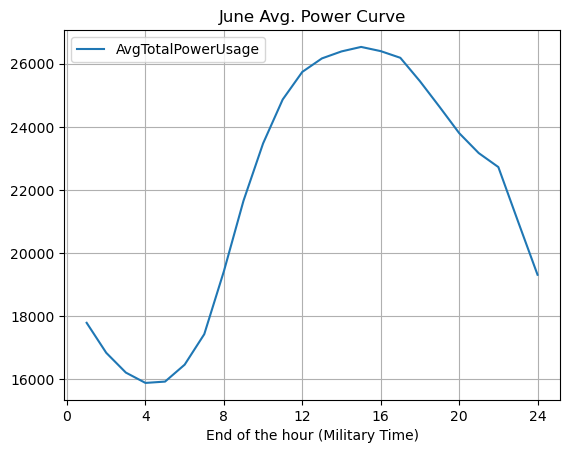

In [52]:
line_June_sorted = df_result_Avg_June.sort_values(by = 'HourEnd', ascending = True)
line_June_sorted.set_index('HourEnd', inplace = True)

line_plot_June = df_result_Avg_June.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("June Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### July Total and Average

In [53]:
July_NewRiver = df[(df['Month'] == 7)]

July_NewRiver_Total = July_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# July_NewRiver_Total

df_result_July = July_NewRiver_Total.reset_index(name = 'TotalPowerUsage')
df_July_sorted = df_result_July.sort_values(by ='TotalPowerUsage', ascending = False)

df_July_sorted

,HourEnd,TotalPowerUsage
14,15,5279510
15,16,5255347
13,14,5242181
16,17,5209818
12,13,5186374
11,12,5085027
17,18,5072601
18,19,4915637
10,11,4898724
19,20,4725883


In [54]:
July_NewRiver_Avg =July_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_July = July_NewRiver_Avg.reset_index(name ='AvgTotalPowerUsage')
df_Avg_July_sorted = df_result_Avg_July.sort_values(by ='AvgTotalPowerUsage', ascending = False)

df_Avg_July_sorted

,HourEnd,AvgTotalPowerUsage
14,15,28384.46
15,16,28254.55
13,14,28183.77
16,17,28009.77
12,13,27883.73
11,12,27338.85
17,18,27272.05
18,19,26428.16
10,11,26337.23
19,20,25407.97


In [55]:
df_Avg_July_sorted['Time Frame'] = df_Avg_July_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_July_sorted['Time Frame'] = pd.to_datetime(df_Avg_July_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_July_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,28384.46,15:00:00
15,16,28254.55,16:00:00
13,14,28183.77,14:00:00
16,17,28009.77,17:00:00
12,13,27883.73,13:00:00
11,12,27338.85,12:00:00
17,18,27272.05,18:00:00
18,19,26428.16,19:00:00
10,11,26337.23,11:00:00
19,20,25407.97,20:00:00


In [56]:
July_max = df_Avg_July_sorted['AvgTotalPowerUsage'].idxmax()
July_max_df = df_Avg_July_sorted.loc[[July_max]]

July_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,28384.46,15:00:00


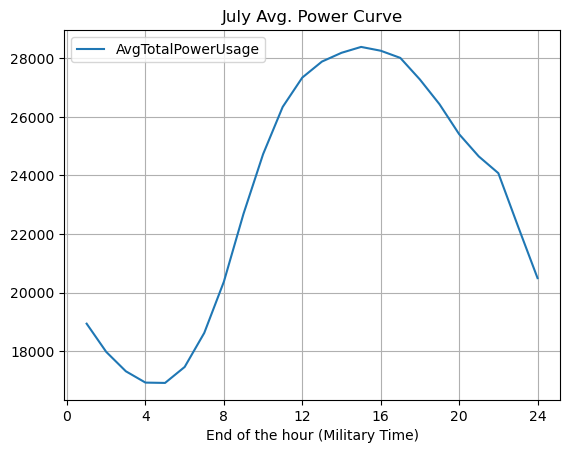

In [57]:
line_July_sorted = df_result_Avg_July.sort_values(by = 'HourEnd', ascending = True)
line_July_sorted.set_index('HourEnd', inplace = True)

line_plot_July = df_result_Avg_July.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("July Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### August Total and Average

In [58]:
August_NewRiver = df[(df['Month'] == 8)]

August_NewRiver_Total = August_NewRiver.groupby('HourEnd')['NewRiver'].sum()


df_result_August = August_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_August_sorted = df_result_August.sort_values(by ='TotalPowerUsage', ascending = False)

df_August_sorted

,HourEnd,TotalPowerUsage
14,15,5455978
15,16,5434155
13,14,5413379
16,17,5384494
12,13,5343976
17,18,5245833
11,12,5231457
18,19,5104080
10,11,5033108
19,20,4945743


In [59]:
August_NewRiver_Avg =August_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_August = August_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_August_sorted = df_result_Avg_August.sort_values(by = 'AvgTotalPowerUsage', ascending=False)

df_Avg_August_sorted

,HourEnd,AvgTotalPowerUsage
14,15,29333.22
15,16,29215.89
13,14,29104.19
16,17,28948.89
12,13,28731.05
17,18,28203.40
11,12,28126.11
18,19,27441.29
10,11,27059.72
19,20,26590.02


In [60]:
df_Avg_August_sorted['Time Frame'] = df_Avg_August_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_August_sorted['Time Frame'] = pd.to_datetime(df_Avg_August_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_August_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,29333.22,15:00:00
15,16,29215.89,16:00:00
13,14,29104.19,14:00:00
16,17,28948.89,17:00:00
12,13,28731.05,13:00:00
17,18,28203.40,18:00:00
11,12,28126.11,12:00:00
18,19,27441.29,19:00:00
10,11,27059.72,11:00:00
19,20,26590.02,20:00:00


In [61]:
August_max = df_Avg_August_sorted['AvgTotalPowerUsage'].idxmax()
August_max_df = df_Avg_August_sorted.loc[[August_max]]

August_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,29333.22,15:00:00


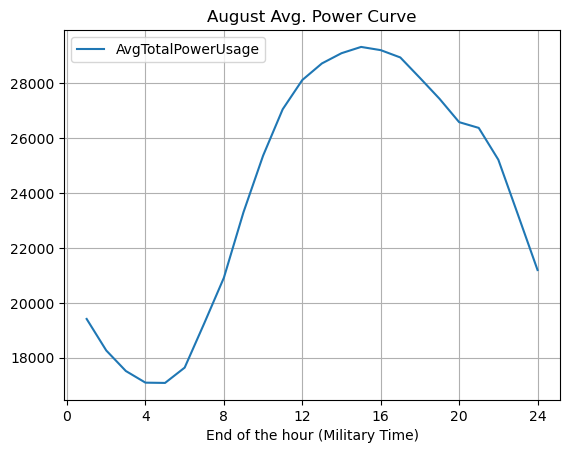

In [62]:
line_August_sorted = df_result_Avg_August.sort_values(by = 'HourEnd', ascending = True)
line_August_sorted.set_index('HourEnd', inplace = True)

line_plot_August = df_result_Avg_August.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("August Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### September Total and Average

In [63]:
Sep_NewRiver = df[(df['Month'] == 9)]

Sep_NewRiver_Total = Sep_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# July_NewRiver_Total

df_result_Sep = Sep_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_Sep_sorted = df_result_Sep.sort_values(by = 'TotalPowerUsage', ascending = False)

df_Sep_sorted

,HourEnd,TotalPowerUsage
14,15,5154458
15,16,5144799
13,14,5118838
16,17,5104255
12,13,5068615
17,18,4989817
11,12,4969910
18,19,4875350
19,20,4835675
20,21,4807395


In [64]:
Sep_NewRiver_Avg =Sep_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Sep = Sep_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_Sep_sorted = df_result_Avg_Sep.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_Sep_sorted

,HourEnd,AvgTotalPowerUsage
14,15,28635.88
15,16,28582.22
13,14,28437.99
16,17,28356.97
12,13,28158.97
17,18,27721.21
11,12,27610.61
18,19,27085.28
19,20,26864.86
20,21,26707.75


In [65]:
df_Avg_Sep_sorted['Time Frame'] = df_Avg_Sep_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Sep_sorted['Time Frame'] = pd.to_datetime(df_Avg_Sep_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Sep_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,28635.88,15:00:00
15,16,28582.22,16:00:00
13,14,28437.99,14:00:00
16,17,28356.97,17:00:00
12,13,28158.97,13:00:00
17,18,27721.21,18:00:00
11,12,27610.61,12:00:00
18,19,27085.28,19:00:00
19,20,26864.86,20:00:00
20,21,26707.75,21:00:00


In [66]:
Sep_max = df_Avg_Sep_sorted['AvgTotalPowerUsage'].idxmax()
Sep_max_df = df_Avg_Sep_sorted.loc[[Sep_max]]

Sep_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
14,15,28635.88,15:00:00


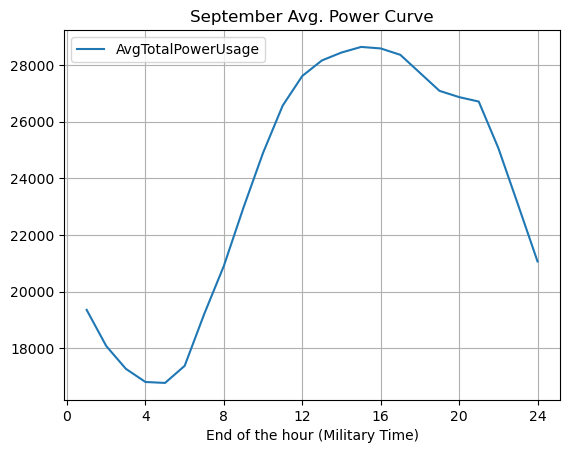

In [67]:
line_Sep_sorted = df_result_Avg_Sep.sort_values(by = 'HourEnd', ascending = True)
line_Sep_sorted.set_index('HourEnd', inplace = True)

line_plot_Sep = df_result_Avg_Sep.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("September Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### October Total and Average

In [68]:
Oct_NewRiver = df[(df['Month'] == 10)]

Oct_NewRiver_Total = Oct_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# July_NewRiver_Total

df_result_Oct = Oct_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_Oct_sorted = df_result_Oct.sort_values(by ='TotalPowerUsage', ascending = False)

df_Oct_sorted

,HourEnd,TotalPowerUsage
12,13,4827029
13,14,4823857
14,15,4810720
11,12,4793565
15,16,4772443
19,20,4766087
16,17,4723308
10,11,4698497
17,18,4646941
18,19,4646055


In [69]:
Oct_NewRiver_Avg = Oct_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Oct = Oct_NewRiver_Avg.reset_index(name = 'AvgTotalPowerUsage')
df_Avg_Oct_sorted = df_result_Avg_Oct.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_Oct_sorted

,HourEnd,AvgTotalPowerUsage
12,13,25951.77
13,14,25934.72
14,15,25864.09
11,12,25771.85
15,16,25658.30
19,20,25624.12
16,17,25394.13
10,11,25260.74
17,18,24983.55
18,19,24978.79


In [70]:
df_Avg_Oct_sorted['Time Frame'] = df_Avg_Oct_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Oct_sorted['Time Frame'] = pd.to_datetime(df_Avg_Oct_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Oct_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
12,13,25951.77,13:00:00
13,14,25934.72,14:00:00
14,15,25864.09,15:00:00
11,12,25771.85,12:00:00
15,16,25658.30,16:00:00
19,20,25624.12,20:00:00
16,17,25394.13,17:00:00
10,11,25260.74,11:00:00
17,18,24983.55,18:00:00
18,19,24978.79,19:00:00


In [71]:
Oct_max = df_Avg_Oct_sorted['AvgTotalPowerUsage'].idxmax()
Oct_max_df = df_Avg_Oct_sorted.loc[[Oct_max]]

Oct_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
12,13,25951.77,13:00:00


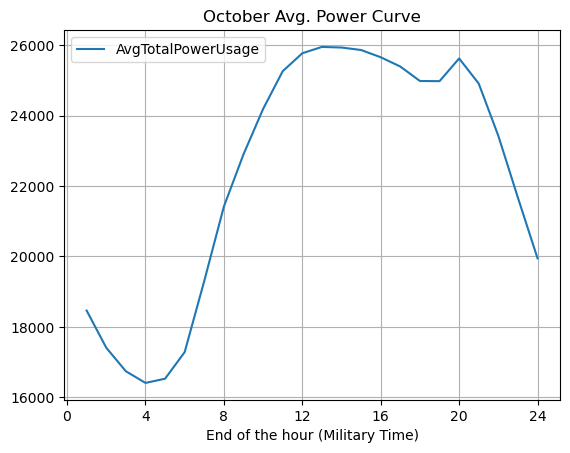

In [72]:
line_Oct_sorted = df_result_Avg_Oct.sort_values(by = 'HourEnd', ascending = True)
line_Oct_sorted.set_index('HourEnd', inplace = True)

line_plot_Oct = df_result_Avg_Oct.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("October Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### November Total and Average

In [73]:
Nov_NewRiver = df[(df['Month'] == 11)]

Nov_NewRiver_Total = Nov_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# July_NewRiver_Total

df_result_Nov = Nov_NewRiver_Total.reset_index(name ='TotalPowerUsage')
df_Nov_sorted = df_result_Nov.sort_values(by = 'TotalPowerUsage', ascending = False)

df_Nov_sorted

,HourEnd,TotalPowerUsage
18,19,4912292
10,11,4872718
19,20,4838577
11,12,4833155
9,10,4818854
17,18,4811326
12,13,4769385
20,21,4712320
8,9,4699467
13,14,4695477


In [74]:
Nov_NewRiver_Avg = Nov_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Nov = Nov_NewRiver_Avg.reset_index(name ='AvgTotalPowerUsage')
df_Avg_Nov_sorted = df_result_Avg_Nov.sort_values(by = 'AvgTotalPowerUsage', ascending = False)

df_Avg_Nov_sorted

,HourEnd,AvgTotalPowerUsage
18,19,27290.51
10,11,27070.66
19,20,26880.98
11,12,26850.86
9,10,26771.41
17,18,26729.59
12,13,26496.58
20,21,26179.56
8,9,26108.15
13,14,26085.98


In [75]:
df_Avg_Nov_sorted['Time Frame'] = df_Avg_Nov_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Nov_sorted['Time Frame'] = pd.to_datetime(df_Avg_Nov_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Nov_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
18,19,27290.51,19:00:00
10,11,27070.66,11:00:00
19,20,26880.98,20:00:00
11,12,26850.86,12:00:00
9,10,26771.41,10:00:00
17,18,26729.59,18:00:00
12,13,26496.58,13:00:00
20,21,26179.56,21:00:00
8,9,26108.15,09:00:00
13,14,26085.98,14:00:00


In [76]:
Nov_max = df_Avg_Nov_sorted['AvgTotalPowerUsage'].idxmax()
Nov_max_df = df_Avg_Nov_sorted.loc[[Nov_max]]

Nov_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
18,19,27290.51,19:00:00


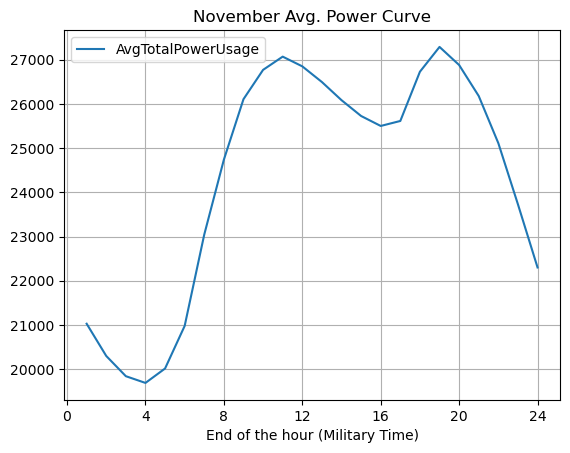

In [77]:
line_Nov_sorted = df_result_Avg_Nov.sort_values(by = 'HourEnd', ascending = True)
line_Nov_sorted.set_index('HourEnd', inplace = True)

line_plot_Nov = df_result_Avg_Nov.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("November Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### December Total and Average

In [78]:
Dec_NewRiver = df[(df['Month'] == 12)]

Dec_NewRiver_Total = Dec_NewRiver.groupby('HourEnd')['NewRiver'].sum()

# July_NewRiver_Total

df_result_Dec = Dec_NewRiver_Total.reset_index(name='TotalPowerUsage')
df_Dec_sorted = df_result_Dec.sort_values(by='TotalPowerUsage', ascending = False)

df_Dec_sorted

,HourEnd,TotalPowerUsage
10,11,5242411
9,10,5223392
18,19,5190862
11,12,5176594
8,9,5137713
19,20,5131540
17,18,5114881
12,13,5075601
20,21,5036919
13,14,4989454


In [79]:
Dec_NewRiver_Avg = Dec_NewRiver.groupby('HourEnd')['NewRiver'].mean().round(2)

df_result_Avg_Dec = Dec_NewRiver_Avg.reset_index(name ='AvgTotalPowerUsage')
df_Avg_Dec_sorted = df_result_Avg_Dec.sort_values(by ='AvgTotalPowerUsage', ascending = False)

df_Avg_Dec_sorted

,HourEnd,AvgTotalPowerUsage
10,11,28185.01
9,10,28082.75
18,19,27907.86
11,12,27831.15
8,9,27622.11
19,20,27588.92
17,18,27499.36
12,13,27288.18
20,21,27080.21
13,14,26825.02


In [80]:
df_Avg_Dec_sorted['Time Frame'] = df_Avg_Dec_sorted['HourEnd'].astype(str).replace('24', '00') + ':00'

# use dt.time accessor to get rid of the 1901-01-01
df_Avg_Dec_sorted['Time Frame'] = pd.to_datetime(df_Avg_Dec_sorted['Time Frame'], format = '%H:%M').dt.time

df_Avg_Dec_sorted

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,28185.01,11:00:00
9,10,28082.75,10:00:00
18,19,27907.86,19:00:00
11,12,27831.15,12:00:00
8,9,27622.11,09:00:00
19,20,27588.92,20:00:00
17,18,27499.36,18:00:00
12,13,27288.18,13:00:00
20,21,27080.21,21:00:00
13,14,26825.02,14:00:00


In [81]:
Dec_max = df_Avg_Dec_sorted['AvgTotalPowerUsage'].idxmax()
Dec_max_df = df_Avg_Dec_sorted.loc[[Dec_max]]

Dec_max_df

,HourEnd,AvgTotalPowerUsage,Time Frame
10,11,28185.01,11:00:00


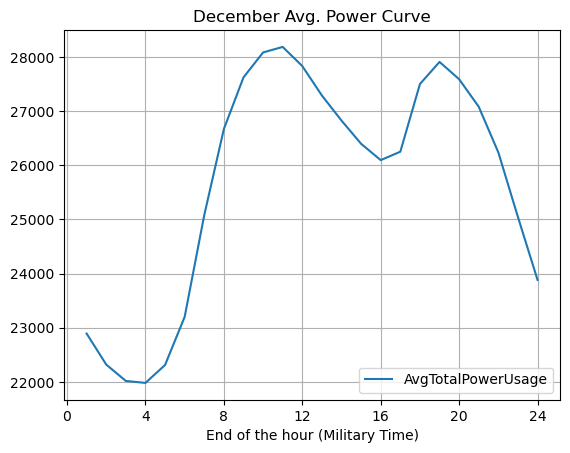

In [82]:
line_Dec_sorted = df_result_Avg_Dec.sort_values(by = 'HourEnd', ascending = True)
line_Dec_sorted.set_index('HourEnd', inplace = True)

line_plot_Dec = df_result_Avg_Dec.plot.line(x = 'HourEnd', y = 'AvgTotalPowerUsage')

plt.title("December Avg. Power Curve")
plt.xticks(range(0,25,4))
plt.xlabel("End of the hour (Military Time)")
plt.grid(True)
plt.show()

### Correlation matrix for a statistical comparison of power usage between months

In [83]:
# DataFrame to use for the power usage patterns of different months
Months_comparison = pd.DataFrame({
    'January': df_Avg_Jan_sorted['AvgTotalPowerUsage'],
    'February': df_Avg_Feb_sorted['AvgTotalPowerUsage'],
    'March': df_Avg_March_sorted['AvgTotalPowerUsage'],
    'April': df_Avg_April_sorted['AvgTotalPowerUsage'],
    'May': df_Avg_May_sorted['AvgTotalPowerUsage'],
    'June': df_Avg_June_sorted['AvgTotalPowerUsage'],
    'July': df_Avg_July_sorted['AvgTotalPowerUsage'],
    'August': df_Avg_August_sorted['AvgTotalPowerUsage'],
    'September': df_Avg_Sep_sorted['AvgTotalPowerUsage'],
    'October': df_Avg_Oct_sorted['AvgTotalPowerUsage'],
    'November': df_Avg_Nov_sorted['AvgTotalPowerUsage'],
    'December': df_Avg_Dec_sorted['AvgTotalPowerUsage']
})

correlation_matrix = Months_comparison.corr()

correlation_matrix


,January,February,March,April,May,June,July,August,September,October,November,December
January,1.000000,0.995385,0.973206,0.934845,0.866108,0.838219,0.825292,0.832789,0.843728,0.913792,0.986630,0.997897
February,0.995385,1.000000,0.983460,0.960998,0.902131,0.876297,0.864381,0.871848,0.881830,0.942957,0.991596,0.992169
March,0.973206,0.983460,1.000000,0.968246,0.903988,0.873539,0.859544,0.862919,0.867933,0.930582,0.964714,0.970005
April,0.934845,0.960998,0.968246,1.000000,0.978875,0.962321,0.954468,0.958678,0.961230,0.986439,0.965883,0.937263
May,0.866108,0.902131,0.903988,0.978875,1.000000,0.997358,0.994905,0.994552,0.991866,0.988450,0.926692,0.874771
June,0.838219,0.876297,0.873539,0.962321,0.997358,1.000000,0.999425,0.997793,0.993667,0.981104,0.908416,0.849230
July,0.825292,0.864381,0.859544,0.954468,0.994905,0.999425,1.000000,0.998385,0.994079,0.977371,0.899741,0.837295
August,0.832789,0.871848,0.862919,0.958678,0.994552,0.997793,0.998385,1.000000,0.998469,0.982696,0.906434,0.843269
September,0.843728,0.881830,0.867933,0.961230,0.991866,0.993667,0.994079,0.998469,1.000000,0.987353,0.914976,0.852549
October,0.913792,0.942957,0.930582,0.986439,0.988450,0.981104,0.977371,0.982696,0.987353,1.000000,0.961754,0.918340


- This is useful becuase when I go to forecast, I want to train the model's using similar months so that the forecast will be more accurate. Focusing on training the prediction model using data from months that exhibit similar patterns for the specific time frame will lead to more accurate results. For example, including a summer month will not make the prediction more accurate for a winter month (like January or February)

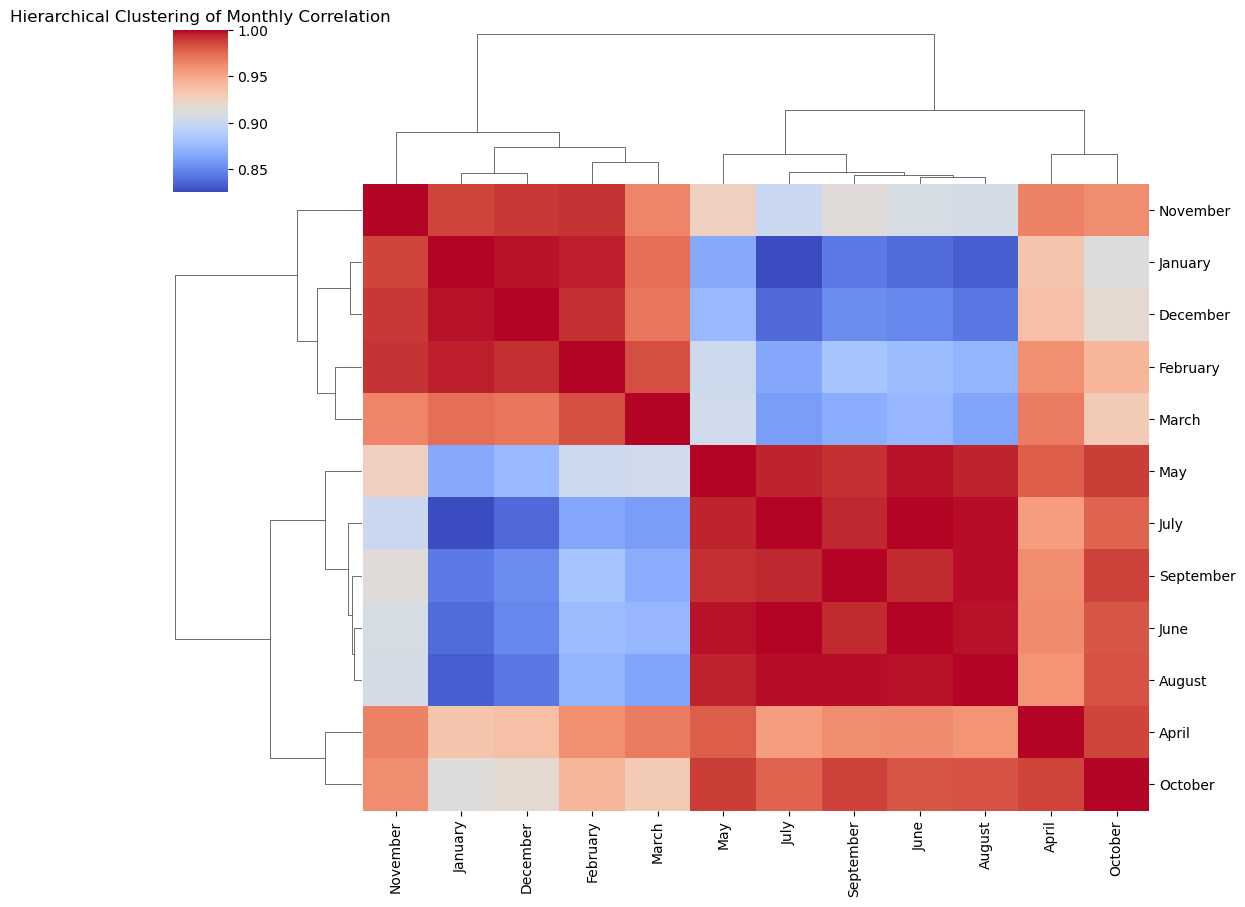

In [84]:
sns.clustermap(correlation_matrix, method = 'average', cmap = 'coolwarm', figsize = (11, 9))
plt.title('Hierarchical Clustering of Monthly Correlation')
plt.show()

In [85]:
import numpy as np

# List of month names
months = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December']

corr_threshold = 0.97

mask = np.triu(np.ones_like(correlation_matrix), k = 1)

indices = np.where((correlation_matrix * mask) >= corr_threshold)

groupings = [(months[month1], months[month2]) for month1, month2 in zip(indices[0], indices[1])]

print("Groupings based on correlation above", corr_threshold)
print(groupings)


Groupings based on correlation above 0.97
[('January', 'February'), ('January', 'March'), ('January', 'November'), ('January', 'December'), ('February', 'March'), ('February', 'November'), ('February', 'December'), ('March', 'December'), ('April', 'May'), ('April', 'October'), ('May', 'June'), ('May', 'July'), ('May', 'August'), ('May', 'September'), ('May', 'October'), ('June', 'July'), ('June', 'August'), ('June', 'September'), ('June', 'October'), ('July', 'August'), ('July', 'September'), ('July', 'October'), ('August', 'September'), ('August', 'October'), ('September', 'October'), ('November', 'December')]


### Further visualizaiton to see which month can be grouped together

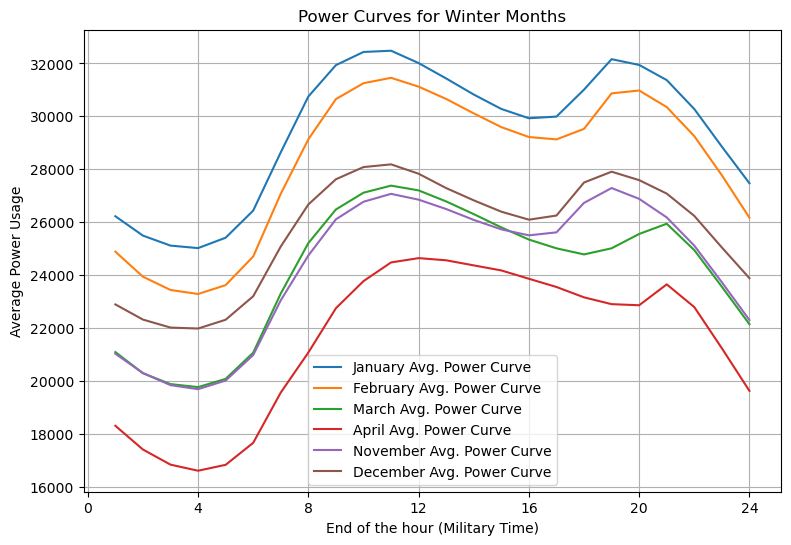

In [86]:
winter_months_to_plot = ['January', 'February', 'March', 'April', 'November', 'December']
dataframes = [df_result_Avg_Jan, df_result_Avg_Feb, df_result_Avg_March, df_result_Avg_April, df_result_Avg_Nov,df_result_Avg_Dec]

plt.figure(figsize = (9, 6))

for month, df_month in zip(winter_months_to_plot, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Winter Months')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()


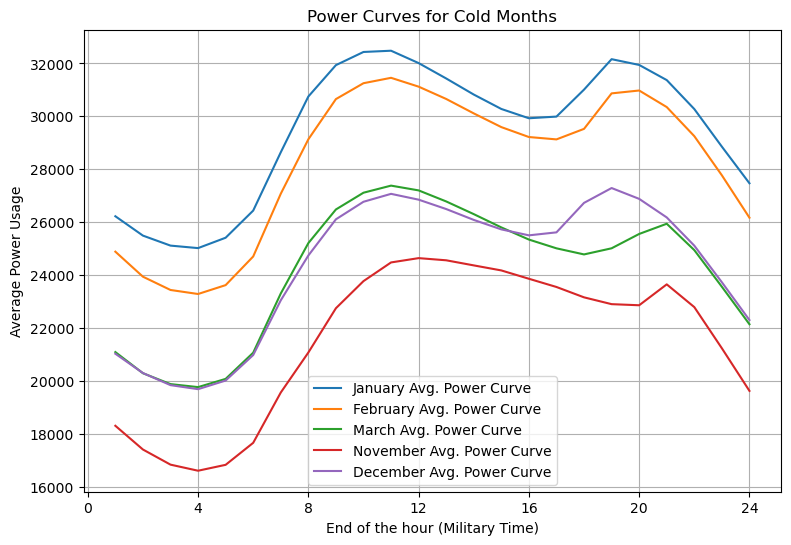

In [87]:
winter_months_to_plot1 = ['January', 'February', 'March', 'November', 'December']
dataframes = [df_result_Avg_Jan, df_result_Avg_Feb, df_result_Avg_March, df_result_Avg_April, df_result_Avg_Nov,df_result_Avg_Dec]

plt.figure(figsize = (9, 6))

for month, df_month in zip(winter_months_to_plot1, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Cold Months')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()

##### We can see that April is an 'outlier' here ^^^

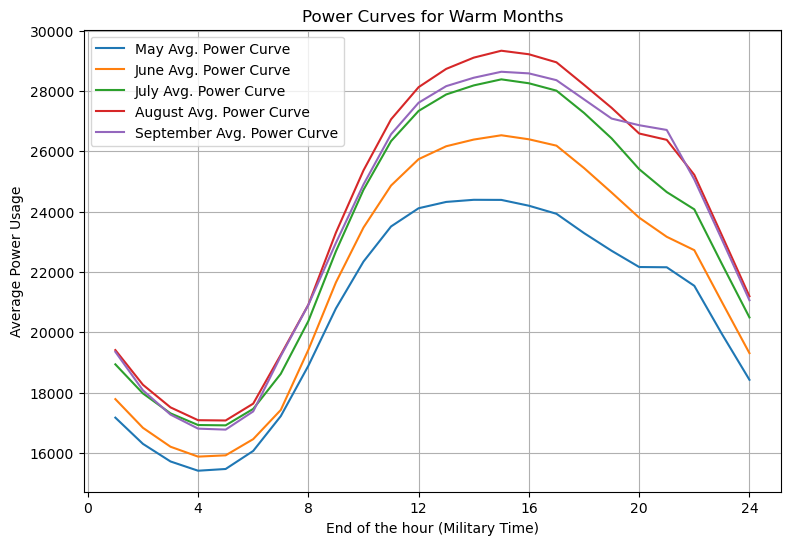

In [88]:
summer_months_to_plot = ['May', 'June', 'July', 'August', 'September']
dataframes = [df_result_Avg_May, df_result_Avg_June, df_result_Avg_July, df_result_Avg_August ,df_result_Avg_Sep]

plt.figure(figsize = (9, 6))

for month, df_month in zip(summer_months_to_plot, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Warm Months')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()

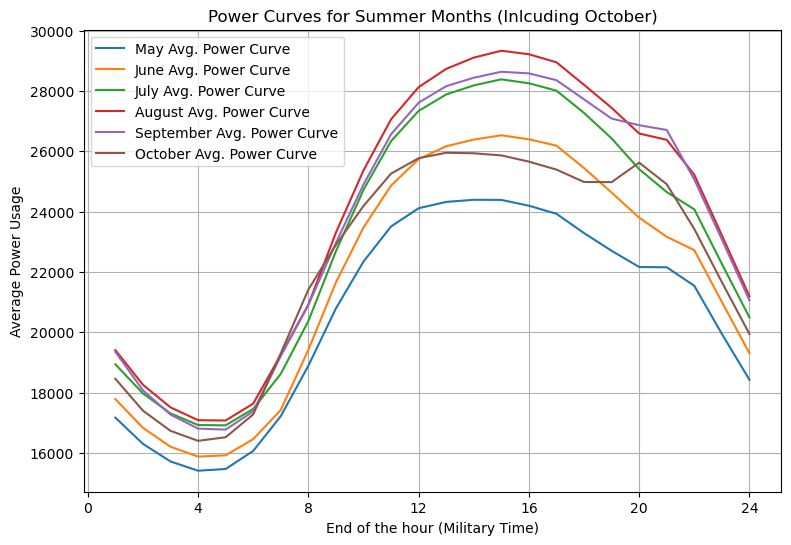

In [89]:
# May -> June -> July -> Aug (Increases)
# Aug -> Sep (Starts to decrease)

summer_months_to_plot = ['May', 'June', 'July', 'August', 'September', 'October']
dataframes = [df_result_Avg_May, df_result_Avg_June, df_result_Avg_July, df_result_Avg_August ,df_result_Avg_Sep, df_result_Avg_Oct]

plt.figure(figsize = (9, 6))

for month, df_month in zip(summer_months_to_plot, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Summer Months (Inlcuding October)')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()

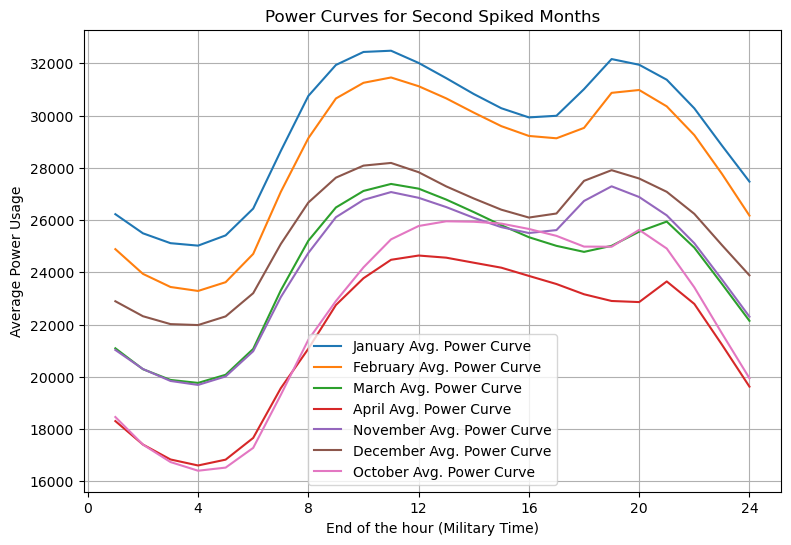

In [90]:
# Months with a second spike

spike_months_to_plot = ['January', 'February', 'March', 'April', 'November', 'December', 'October']
dataframes = [df_result_Avg_Jan, df_result_Avg_Feb, df_result_Avg_March, df_result_Avg_April, df_result_Avg_Nov,df_result_Avg_Dec, df_result_Avg_Oct]

plt.figure(figsize = (9, 6))

for month, df_month in zip(spike_months_to_plot, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Second Spiked Months')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()

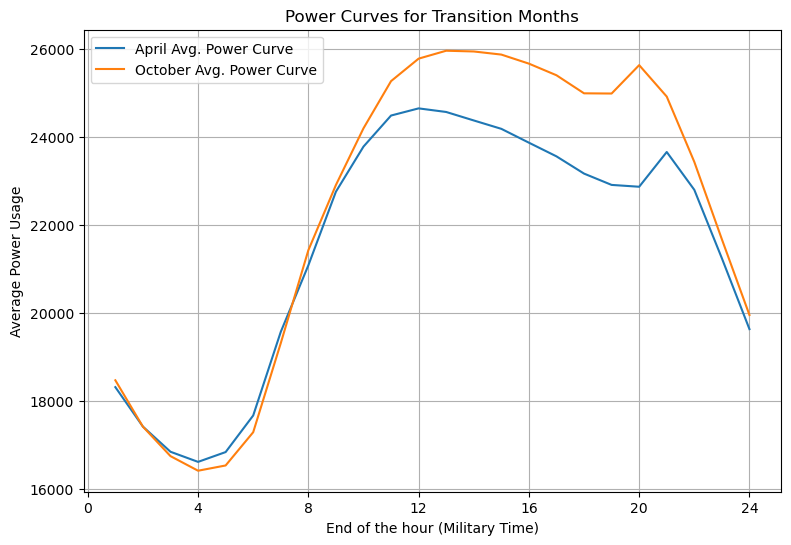

In [91]:
# Months with a second spike

spike_months_to_plot = ['April', 'October']
dataframes = [df_result_Avg_April, df_result_Avg_Oct]

plt.figure(figsize = (9, 6))

for month, df_month in zip(spike_months_to_plot, dataframes):
    line_month_sorted = df_month.sort_values(by = 'HourEnd', ascending=True)
    line_month_sorted.set_index('HourEnd', inplace = True)
    plt.plot(line_month_sorted.index, line_month_sorted['AvgTotalPowerUsage'], label = f'{month} Avg. Power Curve')

plt.xlabel('End of the hour (Military Time)')
plt.ylabel('Average Power Usage')
plt.title('Power Curves for Transition Months')
plt.legend()
plt.xticks(range(0, 25, 4))
plt.grid(True)
plt.show()

## K Means Clustering

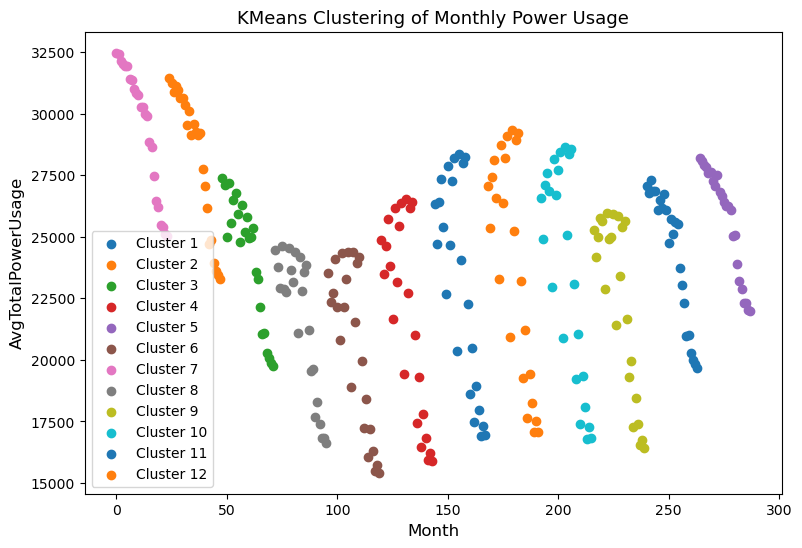

In [92]:
# Create a DataFrame for K-means clustering
months_comparison = pd.concat([
    df_Avg_Jan_sorted['AvgTotalPowerUsage'],
    df_Avg_Feb_sorted['AvgTotalPowerUsage'],
    df_Avg_March_sorted['AvgTotalPowerUsage'],
    df_Avg_April_sorted['AvgTotalPowerUsage'],
    df_Avg_May_sorted['AvgTotalPowerUsage'],
    df_Avg_June_sorted['AvgTotalPowerUsage'],
    df_Avg_July_sorted['AvgTotalPowerUsage'],
    df_Avg_August_sorted['AvgTotalPowerUsage'],
    df_Avg_Sep_sorted['AvgTotalPowerUsage'],
    df_Avg_Oct_sorted['AvgTotalPowerUsage'],
    df_Avg_Nov_sorted['AvgTotalPowerUsage'],
    df_Avg_Dec_sorted['AvgTotalPowerUsage']
], axis = 1)

X = months_comparison.transpose()

num_clusters = 12
kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
clusters = kmeans.fit_predict(X)

clustered_months_comparison = pd.DataFrame({'AvgTotalPowerUsage': X.values.flatten(), 'Cluster': np.repeat(clusters, len(X.columns))})

plt.figure(figsize = (9, 6))
for i in range(num_clusters):
    cluster_data = clustered_months_comparison[clustered_months_comparison['Cluster'] == i]
    plt.scatter(cluster_data.index, cluster_data['AvgTotalPowerUsage'], label = f'Cluster {i + 1}')

plt.xlabel('Month', fontsize = 12)
plt.ylabel('AvgTotalPowerUsage', fontsize = 12)
plt.title('KMeans Clustering of Monthly Power Usage', fontsize = 13)
plt.legend()
plt.show()



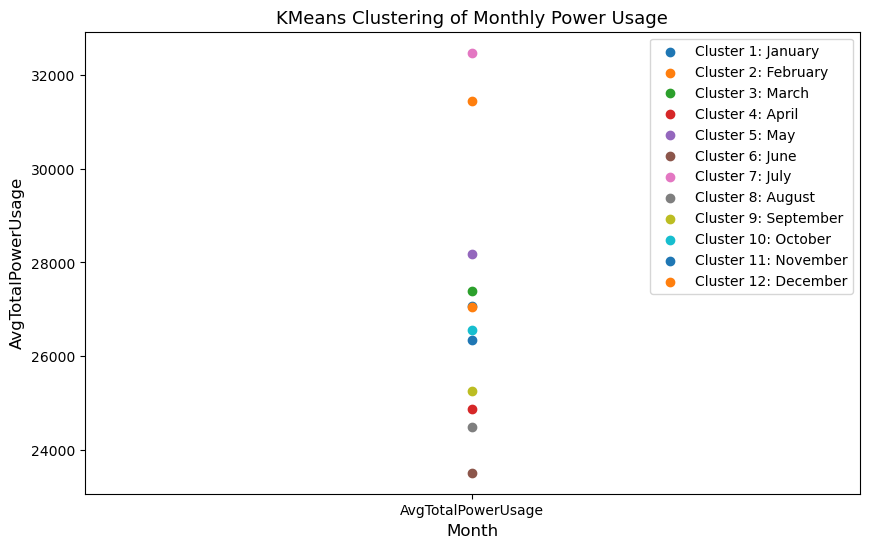

In [93]:
months_comparison = pd.concat([
    df_Avg_Jan_sorted['AvgTotalPowerUsage'],
    df_Avg_Feb_sorted['AvgTotalPowerUsage'],
    df_Avg_March_sorted['AvgTotalPowerUsage'],
    df_Avg_April_sorted['AvgTotalPowerUsage'],
    df_Avg_May_sorted['AvgTotalPowerUsage'],
    df_Avg_June_sorted['AvgTotalPowerUsage'],
    df_Avg_July_sorted['AvgTotalPowerUsage'],
    df_Avg_August_sorted['AvgTotalPowerUsage'],
    df_Avg_Sep_sorted['AvgTotalPowerUsage'],
    df_Avg_Oct_sorted['AvgTotalPowerUsage'],
    df_Avg_Nov_sorted['AvgTotalPowerUsage'],
    df_Avg_Dec_sorted['AvgTotalPowerUsage']
], axis = 1)

X = months_comparison.transpose()

num_clusters = 12

kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
clusters = kmeans.fit_predict(X)

clustered_months_comparison = pd.DataFrame({'AvgTotalPowerUsage': X.values.flatten(), 'Cluster': np.repeat(clusters, len(X.columns))})

month_labels = {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June',
                6: 'July', 7: 'August', 8: 'September', 9: 'October', 10: 'November', 11: 'December'}

plt.figure(figsize = (10, 6))
for i in range(num_clusters):
    cluster_data = X[clusters == i]
    plt.scatter(cluster_data.index, cluster_data.transpose().values[0], label = f'Cluster {i + 1}: {month_labels[i]}')

plt.xlabel('Month', fontsize = 12)
plt.ylabel('AvgTotalPowerUsage', fontsize = 12)
plt.title('KMeans Clustering of Monthly Power Usage', fontsize = 13)
plt.legend()
plt.show()



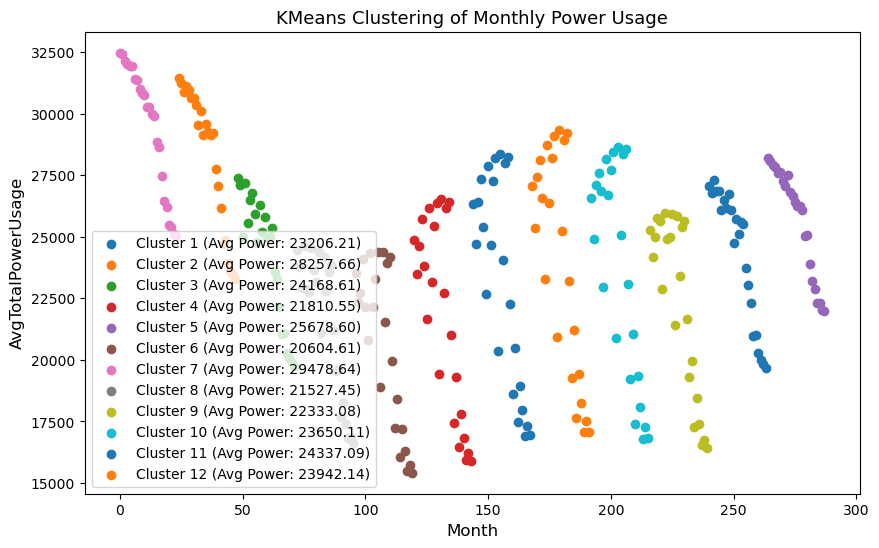

In [94]:
# Create a DataFrame for K-means clustering
months_comparison = pd.concat([
    df_Avg_Jan_sorted['AvgTotalPowerUsage'],
    df_Avg_Feb_sorted['AvgTotalPowerUsage'],
    df_Avg_March_sorted['AvgTotalPowerUsage'],
    df_Avg_April_sorted['AvgTotalPowerUsage'],
    df_Avg_May_sorted['AvgTotalPowerUsage'],
    df_Avg_June_sorted['AvgTotalPowerUsage'],
    df_Avg_July_sorted['AvgTotalPowerUsage'],
    df_Avg_August_sorted['AvgTotalPowerUsage'],
    df_Avg_Sep_sorted['AvgTotalPowerUsage'],
    df_Avg_Oct_sorted['AvgTotalPowerUsage'],
    df_Avg_Nov_sorted['AvgTotalPowerUsage'],
    df_Avg_Dec_sorted['AvgTotalPowerUsage']
], axis = 1)

X = months_comparison.transpose()

num_clusters = 12

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

# create a DataFrame for K-means clustering with the cluster labels
clustered_months_comparison = pd.DataFrame({'AvgTotalPowerUsage': X.values.flatten(), 'Cluster': np.repeat(clusters, len(X.columns))})

plt.figure(figsize = (10, 6))
for i in range(num_clusters):
    cluster_data = clustered_months_comparison[clustered_months_comparison['Cluster'] == i]

    # Calculatin average power usage for the cluster
    avg_power = cluster_data['AvgTotalPowerUsage'].mean()

    plt.scatter(cluster_data.index, cluster_data['AvgTotalPowerUsage'], label = f'Cluster {i + 1} (Avg Power: {avg_power:.2f})')

plt.xlabel('Month', fontsize = 12)
plt.ylabel('AvgTotalPowerUsage', fontsize = 12)
plt.title('KMeans Clustering of Monthly Power Usage', fontsize=13)
plt.legend()
plt.show()


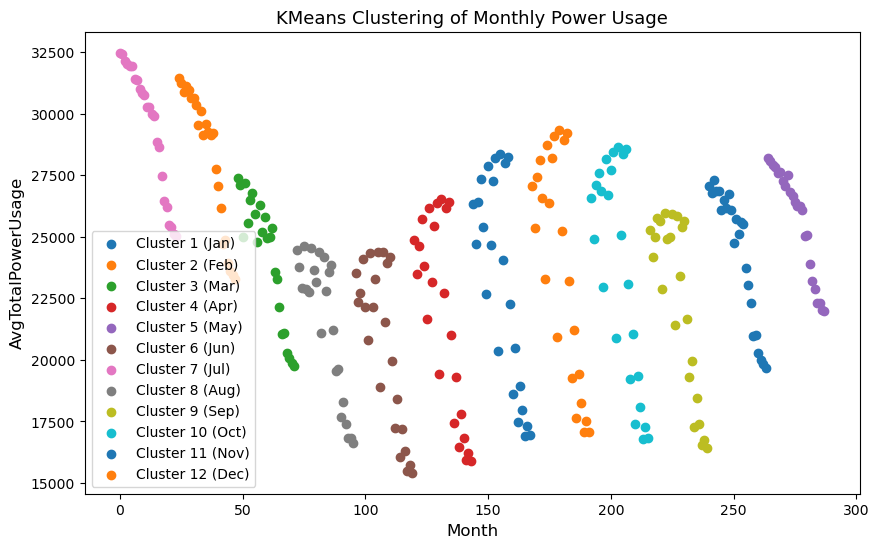

In [95]:
### create a DataFrame for K-means clustering
months_comparison = pd.concat([
    df_Avg_Jan_sorted['AvgTotalPowerUsage'],
    df_Avg_Feb_sorted['AvgTotalPowerUsage'],
    df_Avg_March_sorted['AvgTotalPowerUsage'],
    df_Avg_April_sorted['AvgTotalPowerUsage'],
    df_Avg_May_sorted['AvgTotalPowerUsage'],
    df_Avg_June_sorted['AvgTotalPowerUsage'],
    df_Avg_July_sorted['AvgTotalPowerUsage'],
    df_Avg_August_sorted['AvgTotalPowerUsage'],
    df_Avg_Sep_sorted['AvgTotalPowerUsage'],
    df_Avg_Oct_sorted['AvgTotalPowerUsage'],
    df_Avg_Nov_sorted['AvgTotalPowerUsage'],
    df_Avg_Dec_sorted['AvgTotalPowerUsage']
], axis = 1)

# Transpose the DataFrame for K-means clustering
X = months_comparison.transpose()

num_clusters = 12

kmeans = KMeans(n_clusters = num_clusters, random_state=42)
clusters = kmeans.fit_predict(X)

clustered_months_comparison = pd.DataFrame({'AvgTotalPowerUsage': X.values.flatten(), 'Cluster': np.repeat(clusters, len(X.columns))})

plt.figure(figsize = (10, 6))
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for i in range(num_clusters):
    cluster_data = clustered_months_comparison[clustered_months_comparison['Cluster'] == i]

    plt.scatter(cluster_data.index, cluster_data['AvgTotalPowerUsage'], label=f'Cluster {i + 1} ({month_names[i]})')

plt.xlabel('Month', fontsize = 12)
plt.ylabel('AvgTotalPowerUsage', fontsize = 12)
plt.title('KMeans Clustering of Monthly Power Usage', fontsize = 13)
plt.legend()
plt.show()


# Peak Hour Analysis

In [96]:
newriver = df[['Year', 'Weekday', 'Month', 'Day', 'HourEnd', 'NewRiver']]

In [97]:
newriver.head()

,Year,Weekday,Month,Day,HourEnd,NewRiver
0,2015,4,1,1,1,27333
1,2015,4,1,1,2,27048
2,2015,4,1,1,3,27008
3,2015,4,1,1,4,26821
4,2015,4,1,1,5,26924


In [98]:
monthly_hourly_avg_demand_newriver = newriver.groupby(['Month', 'HourEnd'])['NewRiver'].mean().reset_index()

In [99]:
peak_hours = monthly_hourly_avg_demand_newriver.loc[monthly_hourly_avg_demand_newriver.groupby('Month')['NewRiver'].idxmax()]

In [100]:
peak_hours

,Month,HourEnd,NewRiver
10,1,11,32479.908602
34,2,11,31456.017647
58,3,11,27381.397849
83,4,12,24641.338889
109,5,14,24393.107527
134,6,15,26531.711111
158,7,15,28384.462366
182,8,15,29333.215054
206,9,15,28635.877778
228,10,13,25951.768817


# Random Forest Regression Model

In [101]:
X = newriver[['Year', 'Weekday', 'Month', 'Day', 'HourEnd']]
y = newriver['NewRiver']

# Splitting data in training and testing sets (80 /20 split)
train_data = newriver.iloc[:42088]
test_data = newriver.iloc[42088:]

X_train, y_train = train_data[['Year', 'Month', 'Day', 'HourEnd', 'Weekday']], train_data['NewRiver']
X_test, y_test = test_data[['Year', 'Month', 'Day', 'HourEnd', 'Weekday']], test_data['NewRiver']

# Making sure the calculateions are correct for the training and testing set
X_train.shape, X_test.shape

((42088, 5), (10520, 5))

#### There are 43824 observations in the training set and 8784 observations in the test set (80% training and 20% testing)

### Train the Model

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf_regressor.fit(X_train, y_train)  # training the model

# Predicting on the test set
y_pred = rf_regressor.predict(X_test)

# Calculating performance metrics here
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

mae, rmse

(3228.395100285171, 4173.730170727415)

In [103]:
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)

rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)

X_test_with_predictions = X_test.copy()
X_test_with_predictions['PredictedDemand'] = y_pred_test

monthly_hourly_demand = X_test_with_predictions.groupby(['Month', 'HourEnd'])['PredictedDemand'].mean().reset_index()

# this will find the maximum predicted demand for each month to identify the peak hour
peak_hours_per_month = monthly_hourly_demand.loc[monthly_hourly_demand.groupby('Month')['PredictedDemand'].idxmax()]

rf_df = peak_hours_per_month[['Month', 'HourEnd', 'PredictedDemand']]

rf_df

,Month,HourEnd,PredictedDemand
10,1,11,32993.610000
34,2,11,29406.464138
58,3,11,29205.801613
84,4,13,25170.978667
110,5,15,25441.357742
134,6,15,25900.754667
158,7,15,28210.920000
182,8,15,28868.415484
207,9,16,30382.872667
227,10,12,26412.976429


### A little background on Random Forest Regression and how it works
- creates a 'forest' of decision trees, with each tree built on differnet samples and subsets of the data
- model randomly selects observations and features (Year,weekday, month, day, hourEnd) when building each of these trees
- some trees use data from certain months or weekdays and others might use different combinations
- The model takes the average of the outputs from all the trees
    - for each hour, it considers the prediction of each tree and averages them to come up with the final predictions
- After the training has been done on the historical data, it will use patterns learned from the features (ex: if higher usage happens at a specific time) to estimate the expected usage
- By grouping the predicted demands by 'month' and 'hourEnd' and then averaging them, the peak demand hours for each month are identified
    - select the hour with the highest predicted demand for each month

#### When looking at the graphs, the hour end number comes a little before the number on the graph.
#### For example, HourEnd 11 for december... is from 10 am - 11 am, and this matches the power curve

In [104]:
monthly_peak_dfs = [Jan_max_df, Feb_max_df, March_max_df, April_max_df, May_max_df, June_max_df, July_max_df, August_max_df, Sep_max_df, Oct_max_df, Nov_max_df, Dec_max_df]

monthly_peaks_df = pd.concat(monthly_peak_dfs).reset_index(drop = True)

final_df = pd.merge(rf_df, monthly_peaks_df, left_on = 'Month', right_index = True)

final_df = final_df.rename(columns = {
    'HourEnd_x' : 'HourEnd(RandomForest)',
    'PredictedDemand' : 'PredictedDemand(RandomForest)',
    'HourEnd_y' : 'HourEnd(Actual)',
})

final_df = final_df.drop(columns = 'Time Frame')

final_df

,Month,HourEnd(RandomForest),PredictedDemand(RandomForest),HourEnd(Actual),AvgTotalPowerUsage
10,1,11,32993.610000,11,31456.02
34,2,11,29406.464138,11,27381.40
58,3,11,29205.801613,12,24641.34
84,4,13,25170.978667,14,24393.11
110,5,15,25441.357742,15,26531.71
134,6,15,25900.754667,15,28384.46
158,7,15,28210.920000,15,29333.22
182,8,15,28868.415484,15,28635.88
207,9,16,30382.872667,13,25951.77
227,10,12,26412.976429,19,27290.51


In [105]:
Jan_max_df['Month'] = 1
Feb_max_df['Month'] = 2
March_max_df['Month'] = 3
April_max_df['Month'] = 4
May_max_df['Month'] = 5
June_max_df['Month'] = 6
July_max_df['Month'] = 7
August_max_df['Month'] = 8
Sep_max_df['Month'] = 9
Oct_max_df['Month'] = 10
Nov_max_df['Month'] = 11
Dec_max_df['Month'] = 12

monthly_peak_dfs = [Jan_max_df, Feb_max_df, March_max_df, April_max_df, May_max_df, June_max_df, July_max_df, August_max_df, Sep_max_df, Oct_max_df, Nov_max_df, Dec_max_df]

monthly_peaks_df = pd.concat(monthly_peak_dfs).reset_index(drop = True)

final_df = pd.merge(rf_df, monthly_peaks_df, left_on = 'Month', right_on = 'Month')

final_df = final_df.rename(columns = {
    'HourEnd_x' : 'HourEnd(RandomForest)',
    'PredictedDemand' : 'PredictedDemand(RandomForest)',
    'HourEnd_y' : 'HourEnd(Actual)',
})

final_df = final_df.drop(columns = 'Time Frame')

final_df

,Month,HourEnd(RandomForest),PredictedDemand(RandomForest),HourEnd(Actual),AvgTotalPowerUsage
0,1,11,32993.610000,11,32479.91
1,2,11,29406.464138,11,31456.02
2,3,11,29205.801613,11,27381.40
3,4,13,25170.978667,12,24641.34
4,5,15,25441.357742,14,24393.11
5,6,15,25900.754667,15,26531.71
6,7,15,28210.920000,15,28384.46
7,8,15,28868.415484,15,29333.22
8,9,16,30382.872667,15,28635.88
9,10,12,26412.976429,13,25951.77


### Barchart showing output from Random Forest Regression and Power Curves

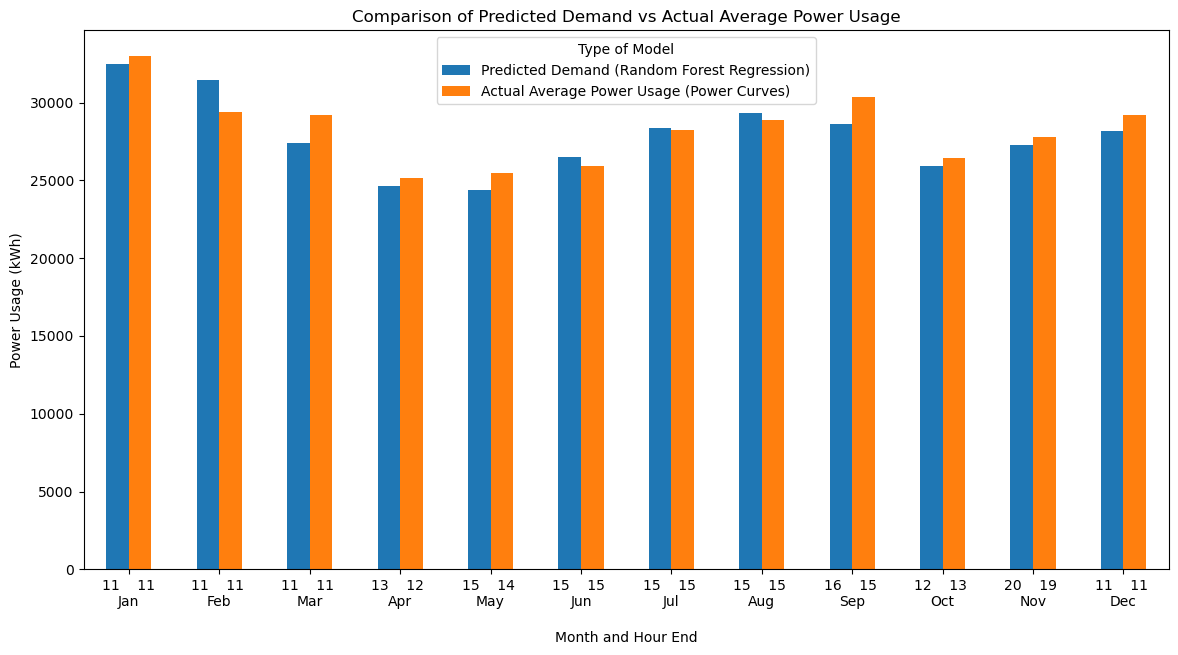

In [106]:
pivot_df = final_df.pivot_table(index='Month', values=['PredictedDemand(RandomForest)', 'AvgTotalPowerUsage'])

pivot_df.columns = ['Predicted Demand (Random Forest Regression)', 'Actual Average Power Usage (Power Curves)']

visual = pivot_df.plot(kind = 'bar', figsize = (14, 7))
visual.set_xticklabels(['11    11\nJan', '11    11 \nFeb', '11    11 \nMar', '13    12 \nApr', '15    14 \nMay',
                    '15    15 \nJun', '15    15 \nJul', '15    15 \nAug', '16    15 \nSep',
                    '12    13 \nOct', '20    19 \nNov', '11    11 \nDec'], rotation = 360)


plt.xlabel('\nMonth and Hour End')
plt.ylabel('Power Usage (kWh)')
plt.title('Comparison of Predicted Demand vs Actual Average Power Usage')
plt.legend(title = 'Type of Model')
plt.show()

# Similarity Statistics for the output above

In [107]:
avg_peak_usage = final_df['AvgTotalPowerUsage'].values
predicted_peak_usage = final_df['PredictedDemand(RandomForest)'].values

In [108]:
from sklearn.metrics import r2_score

r_squared = r2_score(avg_peak_usage, predicted_peak_usage)

print("R-squared value:", r_squared)

R-squared value: 0.7822025378274747


- 78.2% of the variance in the actual average peak hour demand from the power curves can be explained by the random forest regressor's predictions

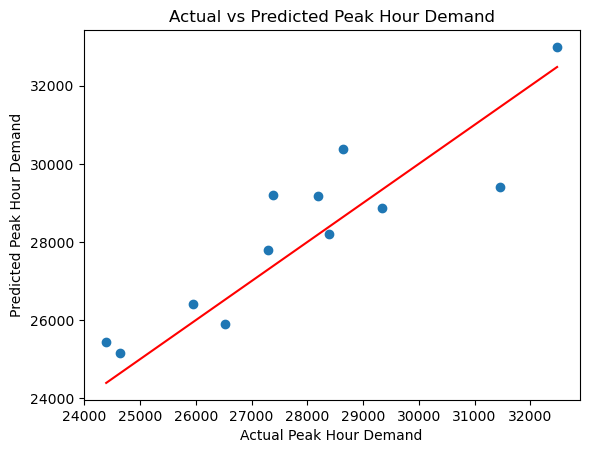

In [109]:
plt.scatter(avg_peak_usage, predicted_peak_usage)
plt.title('Actual vs Predicted Peak Hour Demand')
plt.xlabel('Actual Peak Hour Demand')
plt.ylabel('Predicted Peak Hour Demand')
plt.plot([min(avg_peak_usage), max(avg_peak_usage)], [min(avg_peak_usage), max(avg_peak_usage)], color = 'red')
plt.show()

### Blue data points:
- The x-coordinate of the blue point is the actual peak hour demand that was obtained from the average power curve.
- The y-coordinate of the blue point is the predicted peak hour demand from the random forest model.
### Red Line (the line of perfect fit):
- Represents wehre the data points would lie if the models predictions were 'perfect'
- i.e. for any point on this line, the predicted value is equal to the actual value (y = x) --> predicted demand = actual demand
### Supp. Notes
- If a blue point lies exactly on the red line, this indicates that for that particular month, the model's prediction of peak hour demand is exactly the same as the actual peak hour demand
- If a blue point is above the red line, the model overestimated the peak hour demand for that month (the prediction was higher than the actual demand), and if a blue point is below the red line, the model underestimated the peak hour demand for that month (the prediction was lower than the actual demand).

# MAE and RMSE for Random Forest Regressor Output

In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [111]:
# use avg_peak_usage and predicted_peak_usage from above

mae = mean_absolute_error(avg_peak_usage, predicted_peak_usage)
print("Mean Absolute Error (MAE):", mae)

mse = mean_squared_error(avg_peak_usage, predicted_peak_usage)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 911.6994296859826
Root Mean Squared Error (RMSE): 1092.4570900789852


# Hypothesis Testing
- Ho: Actual average peak demand from power curves = Predicted peak demand from random forest regression model
- Ha: Actual average peak demand from power curves ≠ Predicted peak demand from random forest regression model

In [112]:
from scipy import stats

t_stat, p_value = stats.ttest_rel(avg_peak_usage, predicted_peak_usage)

print("t-statistic:", t_stat, "p-value:", p_value)

t-statistic: -1.1523913939997472 p-value: 0.2735894453508184


In [113]:
alpha = 0.05
if p_value < alpha:
    print("We reject the null hypothesis (Ho), suggesting a significant difference between the actual and predicted peak demand.")
else:
    print("We fail to reject the null hypothesis (Ho), suggesting no significant difference between the actual and predicted peak demand.")

We fail to reject the null hypothesis (Ho), suggesting no significant difference between the actual and predicted peak demand.


# More Detailed (XG Boost) (DONT USE!!!)

In [114]:
#pip install xgboost

In [115]:
import xgboost as xgb

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
xgb_regressor = xgb.XGBRegressor(n_estimators = 100, learning_rate = 0.1, max_depth = 5, random_state = 42)
xgb_regressor.fit(X_train, y_train)

y_pred_xgb = xgb_regressor.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"MAE: {mae_xgb}, RMSE: {rmse_xgb}")

In [ ]:
X_test['PredictedDemand'] = y_pred_xgb

In [ ]:
monthly_hourly_demand_xgb = X_test.groupby(['Month', 'HourEnd'])['PredictedDemand'].mean().reset_index()

# Finding th hour with the highest average predicted demand for each month
peak_hours_per_month_xgb = monthly_hourly_demand_xgb.loc[monthly_hourly_demand_xgb.groupby('Month')['PredictedDemand'].idxmax()]

peak_hours_per_month_xgb[['Month', 'HourEnd', 'PredictedDemand']]

# Average Temperature Data Section

In [ ]:
temp = pd.read_csv("AvgBooneTemp.csv")

In [ ]:
temp.head()

In [ ]:
temp_dtype = temp.dtypes
temp_dtype

In [ ]:
new_df = pd.merge(df, temp, on = ['Year', 'Month', 'Day'])

In [ ]:
new_df.head()

In [ ]:
#new_df = new_df.drop(columns = ['UTC', 'DST', 'Date_x', 'Date_y'])

new_df = new_df.drop(columns = ['UTC', 'DST'])

In [ ]:
new_df.head()

### Based on random forest regressor output, for each peak demand, see what the temperature is for that hour. See if there is a pattern.
- this will uncover if there is a certain temperature / common temperature for the months that is expected to result in more electricity use. (We can relate back to the correlation matrix and see which temperature correlates with more electricity use)

In [ ]:
len(new_df)

### NOTE: Use Dataframe from random forest regressor model

In [ ]:
January = new_df[(new_df['Month'] == 1)]
February = new_df[(new_df['Month'] == 2)]
March = new_df[(new_df['Month'] == 3)]
April = new_df[(new_df['Month'] == 4)]
May = new_df[(new_df['Month'] == 5)]
June = new_df[(new_df['Month'] == 6)]
July = new_df[(new_df['Month'] == 7)]
August = new_df[(new_df['Month'] == 8)]
September = new_df[(new_df['Month'] == 9)]
October = new_df[(new_df['Month'] == 10)]
November = new_df[(new_df['Month'] == 11)]
December = new_df[(new_df['Month'] == 12)]

In [ ]:
January['AverageAirTemp(F)'] = January['AverageAirTemp(F)'].astype(float)
February['AverageAirTemp(F)'] = February['AverageAirTemp(F)'].astype(float)
March['AverageAirTemp(F)'] = March['AverageAirTemp(F)'].astype(float)
April['AverageAirTemp(F)'] = April['AverageAirTemp(F)'].astype(float)
May['AverageAirTemp(F)'] = May['AverageAirTemp(F)'].astype(float)
June['AverageAirTemp(F)'] = June['AverageAirTemp(F)'].astype(float)
July['AverageAirTemp(F)'] = July['AverageAirTemp(F)'].astype(float)
August['AverageAirTemp(F)'] = August['AverageAirTemp(F)'].astype(float)
September['AverageAirTemp(F)'] = September['AverageAirTemp(F)'].astype(float)
October['AverageAirTemp(F)'] = October['AverageAirTemp(F)'].astype(float)
November['AverageAirTemp(F)'] = November['AverageAirTemp(F)'].astype(float)
December['AverageAirTemp(F)'] = December['AverageAirTemp(F)'].astype(float)

In [ ]:
Jan_Avg = January['AverageAirTemp(F)'].mean()
Feb_Avg = February['AverageAirTemp(F)'].mean()
March_Avg = March['AverageAirTemp(F)'].mean()
April_Avg = April['AverageAirTemp(F)'].mean()
May_Avg = May['AverageAirTemp(F)'].mean()
June_Avg = June['AverageAirTemp(F)'].mean()
July_Avg = July['AverageAirTemp(F)'].mean()
Aug_Avg = August['AverageAirTemp(F)'].mean()
Sep_Avg = September['AverageAirTemp(F)'].mean()
Oct_Avg = October['AverageAirTemp(F)'].mean()
Nov_Avg = November['AverageAirTemp(F)'].mean()
Dec_Avg = December['AverageAirTemp(F)'].mean()

In [ ]:
temp_data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Average Temperature': [Jan_Avg, Feb_Avg, March_Avg, April_Avg, May_Avg, June_Avg, July_Avg, Aug_Avg, Sep_Avg, Oct_Avg, Nov_Avg, Dec_Avg]
}

In [ ]:
avg_monthly_temp = pd.DataFrame(temp_data)
avg_monthly_temp

In [ ]:
final_df = pd.DataFrame(final_df)
final_df

## Combined Average Temperature with findings from Random Forest and Power Curves

In [ ]:
temp_forest_df = pd.concat([final_df, avg_monthly_temp], axis = 1)
temp_forest_df = temp_forest_df[['Month', 'HourEnd(RandomForest)', 'PredictedDemand(RandomForest)', 'HourEnd(Actual)', 'AvgTotalPowerUsage', 'Average Temperature']]
temp_forest_df = temp_forest_df.iloc[:, [0, 2, 3, 4, 5, 6]]
temp_forest_df

### Discovering the temperature windows/intervals that contribute to peak hour electricity usage

In [ ]:
# in the excel sheet, 2.6 is the lowest temp and 77 is the highest temp
# increment by about 15 degrees for the most part


temp_bins = [min(temp_forest_df['Average Temperature']), 40, 45, 50, 55, 60, 65, max(temp_forest_df['Average Temperature'])]

temp_bin_labels = ['<35°F', '35-40°F', '40-45°F', '45-50°F', '50-55°F', '55-60°F', '60-65°F']

temp_forest_df['Temperature Interval'] = pd.cut(temp_forest_df['Average Temperature'], bins = temp_bins, labels = temp_bin_labels, include_lowest = True)

peak_usage_by_temp_interval = temp_forest_df.groupby('Temperature Interval')['AvgTotalPowerUsage', 'PredictedDemand(RandomForest)'].mean().reset_index()

peak_usage_by_temp_interval

In [ ]:
temp_bins2 = [min(new_df['AverageAirTemp(F)']), 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, max(new_df['AverageAirTemp(F)'])]

temp_bin_labels2 = ['<5°F', '5-10°F', '10-15°F', '15-20°F', '20-25°F', '25-30°F', '30-35°F', '35-40°F', '40-45°F', '45-50°F', '50-55°F', '55-60°F', '60-65°F', '>65°F']

new_df['Temperature Interval'] = pd.cut(new_df['AverageAirTemp(F)'], bins = temp_bins2, labels = temp_bin_labels2, include_lowest = True)

peak_usage_by_temp_interval2 = new_df.groupby('Temperature Interval')['NewRiver'].mean().reset_index()

peak_usage_by_temp_interval2

In [ ]:
plt.figure(figsize = (13, 8))
sns.barplot(x = 'Temperature Interval', y = 'NewRiver', data = peak_usage_by_temp_interval2)
plt.title('Average Power Usage by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Power Usage')
plt.grid(True)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
peak_usage_by_temp_interval2['NormalizedPowerUsage'] = scaler.fit_transform(peak_usage_by_temp_interval2[['NewRiver']])

kmeans = KMeans(n_clusters = 5, random_state = 0)

peak_usage_by_temp_interval2['Cluster'] = kmeans.fit_predict(peak_usage_by_temp_interval2[['NormalizedPowerUsage']])

sns.scatterplot(data = peak_usage_by_temp_interval2, x = 'Temperature Interval', y = 'NormalizedPowerUsage', hue = 'Cluster', palette = 'viridis')


plt.xticks(rotation = 45) # turns x-axis labels

plt.title('Average Power Usage by Temperature Interval (Clustered)')
plt.xlabel('Temperature Interval')
plt.ylabel('Normalized Average Power Usage')
plt.show()


### Explanation of Bar Plot and K-Means Clustering

#### Bar Plot
- The coldest intervals show the highest power usage. This is likely due to heat demand

#### Cluster Plot
- There's a clear cluster (cluster 0) of colder temperature intervals and increased electricity for heating
- The middle temperature intervals (20-25°F to 45-50°F) show more variability in power usage. Could be due to transitional temperatures where heating is still being used, but less consistently
- Past 50°F, power usage decreases
- Past 65°F, power usage starts to increase and this could be due to people now using Air Conditioning

In [ ]:
# Uses Random Forest Peak Demand Predictions
sns.lineplot(data=temp_forest_df, x = 'Average Temperature', y = 'PredictedDemand(RandomForest)', color = 'purple', marker = 'o')
plt.title("Average Total Power Usage (Random Forest Predictions) vs. Average Temperature\n\n(Each Data Point Corresponds to Each Month's Predictions)\n")
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Average Total Power Usage')
plt.legend(labels = ['Predicted Demand', 'Actual Usage'])
plt.grid(True)
plt.show()

print("----------------------------------------------------------------------------------------")

# Using Power Curve Peaks
sns.lineplot(data=temp_forest_df, x = 'Average Temperature', y = 'AvgTotalPowerUsage', color = 'green', marker = 'o')
plt.title("Average Total Power Usage (Power Curves) vs. Average Temperature\n\n(Each Data Point Corresponds to Each Month's Predictions)\n")
plt.xlabel('Average Temperature (°F)')
plt.ylabel('Average Total Power Usage')
plt.legend(labels = ['Predicted Demand', 'Actual Usage'])
plt.grid(True)
plt.show()

In [ ]:
correlation_forest = temp_forest_df['Average Temperature'].corr(temp_forest_df['PredictedDemand(RandomForest)'])
correlation_curves = temp_forest_df['Average Temperature'].corr(temp_forest_df['AvgTotalPowerUsage'])
print(f'Correlation coefficient (Avg. Temp vs. Random Forest Regression Predictions: {correlation_forest}')
print("")
print(f'Correlation coefficient (Avg. Temp vs Power Curve Predictions) {correlation_curves}')

### Correlation Coefficient Meaning
- The correlation coefficients above illustrate that there is a moderate negative linear relationship between Average Temperature and Avergae Total Power Usage for both approaches to predictions
- The -0.458 correlation coefficient between Average Temperature and the Random Forest Regression Predictions indicates that as the Average Temperature increases, the predicted electricity demand (from the Random Forest Regression Predictions) tends to decrease moderately
- The -0.411 correlation coefficient between Average Temperature and the Power Curve Predictions indicates that as the Average Temperature increases, the predicted electricity demand (from the Power Curves) also tends to decrease moderately

### Assumptions
- Higher temperatures may not necessarily lead to higher energy consumptions
    - A lot of aparment complexes in Boone, NC do not have air conditioning, so this may also be indicative of lower power consumptions when the temperature increases
    
- The negative correlation also suggests that we might expect lower electricity usage for days that are warmer

## Constructing Bar Chart to see how average daily temperature affects average daily power consumption

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

daily_power_usage = df.groupby('Date')['NewRiver'].mean().reset_index()
daily_power_usage.columns = ['Date', 'AverageDailyPowerUsage']

daily_power_usage['Date'] = daily_power_usage['Date'].dt.strftime('%m/%d/%y')
daily_power_usage

In [ ]:
daily_avg_power_df = pd.concat([daily_power_usage, temp], axis = 1)
daily_avg_power_df = daily_avg_power_df[['Date', 'AverageDailyPowerUsage', 'AverageAirTemp(F)']]
daily_avg_power_df.head()

daily_avg_power_df = daily_avg_power_df.iloc[:, [0, 2, 3]]

daily_avg_power_df


In [ ]:
len(daily_avg_power_df)

In [ ]:
bins = [2.6, 32, 50, 65, 77]
labels = ['Very Cold\n (< 32°F)', 'Cold\n (32°F - 50°F)', 'Moderately Warm\n (50°F - 65°F)', 'Warm\n (> 65°F)']
daily_avg_power_df['TempCategory'] = pd.cut(daily_avg_power_df['AverageAirTemp(F)'], bins = bins, labels = labels, include_lowest = True)


plt.figure(figsize = (10, 6))
sns.barplot(x = 'TempCategory', y = 'AverageDailyPowerUsage', data = daily_avg_power_df)
plt.title('Average Peak Power Usage by Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Average Peak Power Usage')
plt.grid(True)

plt.show()

## Linear Regression of daily average temperature and daily average power usage

In [ ]:
slope, intercept, r_value, p_value, std_err = linregress(daily_avg_power_df['AverageAirTemp(F)'], daily_avg_power_df['AverageDailyPowerUsage'])
print("Slope:", slope, "\nIntercept:", intercept, "\nR-squared:", r_value**2, "\np-value:", p_value)

### Linear Regression output meaning
- **Slope**: for one degree increase in temperature, the average daily power usage decreases by approximately 166.64 units. This indicates that as it gets warmer, the power usage decreases
- **Intercept**: The predicted value of the average daily power usage when the temperature is 0°F is 32,848.94 kWh.
- **R-squared**: The average daily temperature can explain about 36.78% of the average daily power usage
- **p-value**: The p-value being extremely small (2.27e-220) indicates that the relationship between temperature and power usage is statistically significant

## Heatmap

In [ ]:
bins = [2.6, 32, 50, 65, 77]
temp_labels = ['Very Cold\n (< 32°F)', 'Cold\n (32°F - 50°F)', 'Moderately Warm\n (50°F - 65°F', 'Warm\n (> 65°F)']
new_df['TempCategory'] = pd.cut(new_df['AverageAirTemp(F)'], bins = bins, labels = temp_labels, include_lowest = True)

pivot_table = new_df.pivot_table(
    values = 'NewRiver',
    index = 'HourEnd',
    columns = 'TempCategory',
    aggfunc = 'mean'
)

plt.figure(figsize = (12, 9))
ax = sns.heatmap(pivot_table, annot = True, fmt = ".1f", cmap = "coolwarm")
plt.title('Heatmap of Average Electricity Usage by Hour and Temperature Category')
plt.xlabel('\nTemperature Category')
plt.ylabel('Hour of Day')
color_bar = ax.collections[0].colorbar
color_bar.set_label('Average Power Usage\n\n (Blue: Least Power Usage)\n (Red: Most Power Usage)')
plt.show()

### Overall Meaning
- This heatmap visualizes the average electricity usage across different hours of the day and categorized temperature ranges (Very Cold, Cold, Moderately Warm, Warm)
    - Groups the hours based on the temperature ranges that they fall into

- Note: ***Each of the cells represents the average usage for a given hour across all of the days that fall within their respective associated temperature category***

- The different colors represent the magnitude of the power usage
    - Darker red indicates higher power usage
    - Darker blue indicates lower power usage
    
### Reading Example (HourEnd 9 - Very Cold)
- The average electricity usage for the hour ending at 9 AM during very cold temperatures is approximately 35490.8 kWh.
- The corresponding color intensity in the heatmap suggests that this is on the higher end of power usage compared to other hours or temperature categories.
    
### Findings
- Power usage is **highest** on very **cold days** due to heating
- Power usage is **somewhat high** on **warm days** due to cooling
    - The power usage is still not as high as compared to very cold days because a lot of apartment complexes do not have Air Conditioning, or people may result to opening up windows since Boone does not get unbearably hot
    
    
### Specific Findings
- Power usage is at it's highest peak from HourEnd 9 to 12 on **Very Cold** Days
- Power usage is at it's lowest from HourEnd 3 to 6 on **Moderately Warm** Days

## Correlation between average temperature and electricity usage

In [ ]:
correlation = new_df['NewRiver'].corr(new_df['AverageAirTemp(F)'])

correlation

In [ ]:
corr = daily_avg_power_df['AverageDailyPowerUsage'].corr(daily_avg_power_df['AverageAirTemp(F)'])

corr


In [ ]:
# This looks chaotic so don't use this

daily_avg_line = daily_avg_power_df.plot.line(x = 'AverageAirTemp(F)', y = 'AverageDailyPowerUsage')

In [ ]:
sns.lmplot(x = 'AverageAirTemp(F)', y = 'AverageDailyPowerUsage', data = daily_avg_power_df, aspect = 1.5, line_kws = {"color": "red"})

plt.title('Correlation between Average Temperature and Average Power Usage')
plt.xlabel('Average Air Temperature (°F)')
plt.ylabel('Average Daily Power Usage')

# show the correlation coefficient that was calculated earlier
plt.text(85, 20000, 'Correlation:' + str(round(corr,3)), fontsize = 12, ha = 'left', va = 'center')

plt.show()

### Overall Meaning
- As average air temperature increases, average daily power usage decreases
- The red trend line shows this negative relationship

#### Correlation Coefficient (-0.606)
- This correlation suggests a moderate to strong negative correlation between temperature and power usage

# Alex's Work

## Concord

In [118]:
concord = pd.read_csv(r"C:\Users\alexp\Documents\School\Summer 2024\Concord.csv")

demand = pd.read_csv(r"C:\Users\alexp\Documents\School\Summer 2024\Demand_All.csv")

concord.head()

constant_columns = [col for col in concord.columns if concord[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")

Constant columns: ['WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11']


In [ ]:
df.head()

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.strftime('%m-%d-%Y')
df['Date'] = pd.to_datetime(df['Date'])
daily_energy_usage_concord = df.groupby(df['Date'].dt.date)['Concord'].sum()

daily_energy_usage_concord_df = daily_energy_usage_concord.reset_index()

daily_energy_usage_concord_df.drop(columns='Date', inplace=True)

daily_energy_usage_concord_series = daily_energy_usage_concord_df['Concord']

print(daily_energy_usage_concord_series.head())

In [ ]:
df.head()

In [ ]:
concord['DATE'] = pd.to_datetime(concord['DATE'])
df['HourEnd'] = pd.to_datetime(df['HourEnd'])

concord['Month'] = concord['DATE'].dt.month
concord['Day'] = concord['DATE'].dt.day
concord['Year'] = concord['DATE'].dt.year
concord['Concord'] = daily_energy_usage_concord_series

print(concord.head())

In [116]:
weather_data_types = concord.dtypes
weather_data_types

NameError: name 'concord' is not defined

In [117]:
concord = concord.drop(columns=['STATION', 'NAME', 'DATE','WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'])

concord.head()

NameError: name 'concord' is not defined

In [373]:
# Fill missing values with the mean
columns_to_fill = ['DAPR', 'MDPR', 'AWND', 'PRCP']
for col in columns_to_fill:
    concord[col] = concord[col].fillna(concord[col].mean())

In [374]:
# Check for any remaining missing values
missing_values = concord.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values after filling: \n", missing_columns)

Missing values after filling: 
 SNOW       1546
SNWD       2779
TMAX       2782
TMIN       2782
TOBS       2782
Concord    2783
dtype: int64


In [375]:
columns_to_check = ['AWND', 'DAPR', 'MDPR', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS']
for col in columns_to_check:
    concord[col] = concord[col].fillna(concord[col].mean())

# Check again for any remaining missing values
missing_values = concord.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values after second filling: \n", missing_columns)

Missing values after second filling: 
 Concord    2783
dtype: int64


In [376]:
# Replace infinite values with NaN
concord.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any resulting NaNs with column means
for col in concord.columns:
    concord[col] = concord[col].fillna(concord[col].mean())
    
# Check again for any remaining missing or infinite values
print("Final missing values check: \n", concord.isnull().sum())
print("Final infinite values check: \n", np.isinf(concord).sum())

Final missing values check: 
 AWND       0
DAPR       0
MDPR       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
TOBS       0
Month      0
Day        0
Year       0
Concord    0
dtype: int64
Final infinite values check: 
 AWND       0
DAPR       0
MDPR       0
PRCP       0
SNOW       0
SNWD       0
TMAX       0
TMIN       0
TOBS       0
Month      0
Day        0
Year       0
Concord    0
dtype: int64


In [377]:
print(concord)

          AWND      DAPR   MDPR  PRCP      SNOW      SNWD       TMAX  \
0     0.000000  2.909091  0.739  0.00  0.000000  0.000000  47.000000   
1     2.910000  2.909091  0.739  0.00  0.000000  0.000000  54.000000   
2     2.910000  2.909091  0.739  0.18  0.000000  0.000000  52.000000   
3     2.910000  2.909091  0.739  0.17  0.000000  0.000000  51.000000   
4     2.910000  2.909091  0.739  0.22  0.000000  0.000000  65.000000   
...        ...       ...    ...   ...       ...       ...        ...   
4970  2.395222  2.909091  0.739  0.00  0.000000  0.025956  73.952576   
4971  2.395222  2.909091  0.739  0.00  0.000000  0.025956  73.952576   
4972  2.395222  2.909091  0.739  0.00  0.000000  0.025956  73.952576   
4973  2.395222  2.909091  0.739  0.03  0.008516  0.025956  73.952576   
4974  2.395222  2.909091  0.739  0.06  0.008516  0.025956  73.952576   

           TMIN       TOBS  Month  Day  Year       Concord  
0     24.000000  25.000000      1    1  2015  2.333478e+06  
1     25.0000

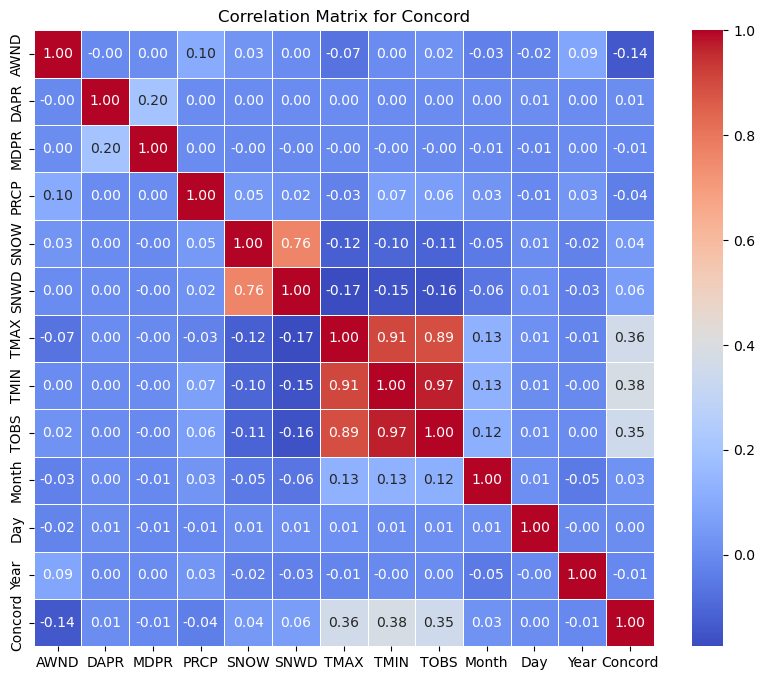

In [378]:
concord_2 = pd.concat([concord], axis = 1)

#Create the correlation matrix
correlation_matrix = concord_2.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Concord')
plt.show()

### Multiple Regression Model

In [136]:
import statsmodels.api as sm

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Concord')
X = df_summer.drop(['Concord'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Concord   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     309.5
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:39:30   Log-Likelihood:                -28951.
No. Observations:                2136   AIC:                         5.793e+04
Df Residuals:                    2123   BIC:                         5.800e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.224e+06   5.02e+06     -1.041      0.2

The regression model explains approximately 63.6% of the variance in peak energy demand (Concord), with a statistically significant F-statistic indicating that the model as a whole is effective. Key predictors include AWND (average wind speed), SNWD (snow depth), and TMAX (maximum temperature), which are statistically significant and demonstrate meaningful relationships with peak energy demand. Specifically, higher wind speeds are associated with lower peak demand, while greater snow depth and maximum temperatures are linked to higher peak demand. While precipitation shows a marginal impact, it is not statistically significant, and other variables like DAPR, MDPR, and TMIN may not contribute meaningfully to the model. Multicollinearity and autocorrelation issues suggest that the model might be refined by addressing these factors and exploring additional predictors.

In [433]:
# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)]

selected_columns = ['AWND', 'SNWD', 'TMAX', 'TOBS', 'Month']

X = df_summer[selected_columns]

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Concord   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     742.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:45:39   Log-Likelihood:                -28954.
No. Observations:                2136   AIC:                         5.792e+04
Df Residuals:                    2130   BIC:                         5.795e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.481e+05   7.89e+04    -10.752      0.0

The updated regression model for predicting peak energy demand during summer months (May, June, July, August, September) accounts for approximately 63.5% of the variance in Concord and demonstrates overall effectiveness with a statistically significant F-statistic. Key predictors include AWND (Average Wind Speed) with a coefficient of -11,270.00, indicating that higher wind speeds reduce peak energy demand, and SNWD (Snow Depth) with a coefficient of 15,540,000.00, showing that increased snow depth raises peak demand. TMAX (Maximum Temperature) and TOBS (Temperature at Observation) have coefficients of 18,480.00 and 29,530.00, respectively, suggesting that higher temperatures lead to increased peak energy demand. The Month variable also has a significant positive impact with a coefficient of 7,932.52. However, the model may suffer from multicollinearity, as suggested by the large condition number (15,600), and positive autocorrelation in the residuals, indicated by a Durbin-Watson statistic of 0.776, which suggests potential patterns not captured by the model. Addressing these issues could improve the model's accuracy and reliability.

In [ ]:
import statsmodels.api as sm

# Filter the DataFrame to include only the winter months (November, December, January, February, March)
df_winter = concord_2[(concord_2['Month'] == 11) | (concord_2['Month'] <= 3)]

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_winter['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                Concord   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     23.60
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           6.50e-49
Time:                        17:31:55   Log-Likelihood:                -21618.
No. Observations:                1581   AIC:                         4.326e+04
Df Residuals:                    1568   BIC:                         4.333e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.899e+07   6.73e+06     -5.795      0.0

The regression model for predicting peak energy demand during winter months (November, December, January, February, March) explains approximately 15.3% of the variance in Concord. The model is statistically significant overall, as indicated by the F-statistic of 23.60 and its associated p-value. Significant predictors include SNWD (Snow Depth) with a coefficient of 131,400.00, indicating a positive relationship where greater snow depth increases peak energy demand, and TMIN (Minimum Temperature) with a coefficient of 8,643.53, suggesting that lower temperatures are associated with higher demand. The Month variable also has a significant negative impact with a coefficient of -5,082.84. However, several predictors such as AWND (Average Wind Speed), DAPR (Day Ahead Price), and PRCP (Precipitation) are not statistically significant. The model's large condition number (2,560,000) indicates potential multicollinearity issues, and the Durbin-Watson statistic of 0.410 suggests positive autocorrelation in the residuals. The model could benefit from addressing multicollinearity and exploring alternative predictors or modeling techniques.

In [ ]:
# Filter the DataFrame to include only the Spring months (April)
df_spring = concord_2[(concord_2['Month'] >= 4) & (concord_2['Month'] <= 4)]

# Define the independent variables (all columns except 'Concord')
X = df_spring.drop(['Concord'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_spring['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Concord   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     41.43
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           4.90e-51
Time:                        17:31:55   Log-Likelihood:                -5196.2
No. Observations:                 384   AIC:                         1.041e+04
Df Residuals:                     374   BIC:                         1.045e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AWND        -1.15e+04   3915.995     -2.936      0.0

In [ ]:
# Filter the DataFrame to include only the Fall months (October)
df_fall = concord_2[(concord_2['Month'] >= 10) & (concord_2['Month'] <= 10)]

# Define the independent variables (all columns except 'Concord')
X = df_fall.drop(['Concord'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_fall['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Concord   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     44.64
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.14e-55
Time:                        17:31:56   Log-Likelihood:                -5680.4
No. Observations:                 423   AIC:                         1.138e+04
Df Residuals:                     413   BIC:                         1.142e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AWND       -8995.2467   4243.708     -2.120      0.0

The OLS regression model you provided does not fit the data well. It explains only 0.1% of the variation in the dependent variable (Concord), indicating that the model explains almost none of the variance in peak energy demand. None of the predictors, such as wind speed, precipitation, and temperature, are statistically significant, meaning they do not have a meaningful impact on predicting Concord. Additionally, the high condition number suggests potential issues with multicollinearity, where some predictors are highly correlated with each other, making the model less reliable. Overall, the model is not effective, and different predictors or alternative modeling approaches may be needed to improve the prediction of peak energy demand.

### Logistic Regression

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)]

# Create a binary dependent variable (0 for not peak, 1 for peak)
# Define a threshold for what is considered a peak
threshold = df_summer['Concord'].quantile(0.9)  # For example, the top 10% of values are considered peak
df_summer = df_summer.copy()  # To avoid SettingWithCopyWarning
df_summer['Peak'] = (df_summer['Concord'] > threshold).astype(int)

# Define the independent variables (all columns except 'Concord' and 'Peak')
X_summer = df_summer.drop(['Concord', 'Peak'], axis=1)

# Handle missing values by replacing infinities and NaNs
X_summer = X_summer.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize the independent variables
scaler = StandardScaler()
X_scaled_summer = scaler.fit_transform(X_summer)
X_scaled_summer = pd.DataFrame(X_scaled_summer, columns=X_summer.columns)  # Keep column names

# Check for multicollinearity using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_df = calculate_vif(X_scaled_summer)
print(vif_df)

# Drop variables with high VIF (threshold of 5 or 10 is commonly used)
high_vif_columns = vif_df[vif_df['VIF'] > 5]['Variable']
X_scaled_summer = X_scaled_summer.drop(high_vif_columns, axis=1)

# Add a constant to the independent variables (required for the regression model)
X_scaled_summer = sm.add_constant(X_scaled_summer)

# Define the dependent variable
y_summer = df_summer.loc[X_summer.index, 'Peak']

# Ensure indices are aligned by reindexing y_summer
y_summer = y_summer.reset_index(drop=True)
X_scaled_summer = X_scaled_summer.reset_index(drop=True)

# Fit the logistic regression model
logit_model_summer = sm.Logit(y_summer, X_scaled_summer).fit(maxiter=100)  # Increase maxiter

# Get the summary of the regression
print(logit_model_summer.summary())

   Variable        VIF
0      AWND   1.066291
1      DAPR   1.117928
2      MDPR   1.117425
3      PRCP   1.120202
4      SNOW   1.732618
5      SNWD   4.626884
6      TMAX   7.708757
7      TMIN  53.308442
8      TOBS  52.243191
9     Month   1.053460
10      Day   1.004712
11     Year   1.085283
         Current function value: 0.224672
         Iterations: 100
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                 2136
Model:                          Logit   Df Residuals:                     2126
Method:                           MLE   Df Model:                            9
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:                  0.3098
Time:                        17:31:59   Log-Likelihood:                -479.90
converged:                      False   LL-Null:                       -695.26
Covariance Type:            nonrobust   LLR p-value:                 3.794e-87
  

C:\Users\alexp\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The provided code and results detail a logistic regression analysis on summer energy usage data, focusing on identifying peak demand days. A multicollinearity check revealed that variables like TMIN and TOBS have high VIF values, indicating redundancy. The logistic model, with a dependent variable indicating peak days and weather-related independent variables, showed a pseudo R-squared of 0.3098, suggesting moderate model fit. The model also indicated that higher wind speeds (AWND) correlate with a lower likelihood of peak demand days, while the month variable showed seasonal variation in peak likelihood. However, convergence issues and a warning about quasi-separation highlight potential problems, such as perfect prediction of some outcomes and difficulty estimating coefficients. The findings suggest a need for further model refinement, possibly by addressing multicollinearity, exploring different modeling techniques, or using more data to improve reliability and interpretability.

### Logistic Regression with Interaction Term

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = concord_2['Concord'].quantile(0.9)
concord_2['Peak'] = (concord_2['Concord'] > threshold).astype(int)

# Define the independent variables (all columns except 'Concord')
X = concord_2.drop(['Concord'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Reset index of X_scaled to ensure alignment with y
X_scaled.reset_index(drop=True, inplace=True)

# Define the dependent variable 'Peak', ensuring it aligns with the cleaned X
y = concord_2.loc[X.index, 'Peak']

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

PerfectSeparationError: Perfect separation detected, results not available

In [ ]:
# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_summer['Concord'].quantile(0.9)
df_summer['Peak'] = (df_summer['Concord'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_summer.drop(['Concord', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_summer.loc[X.index, 'Peak']

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.171261
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                 2136
Model:                          Logit   Df Residuals:                     2130
Method:                           MLE   Df Model:                            5
Date:                Tue, 09 Jul 2024   Pseudo R-squ.:                  0.4738
Time:                        17:32:16   Log-Likelihood:                -365.81
converged:                       True   LL-Null:                       -695.26
Covariance Type:            nonrobust   LLR p-value:                3.803e-140
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6339      0.428    -13.164      0.000      -6.473      -4.795
PRCP          -0.9820      3

The logistic regression model developed to predict peak energy demand days during the summer months (May to September) reveals several insights. The model uses various weather-related and temporal variables, including an interaction term between precipitation (PRCP) and minimum temperature (TMIN). Key metrics include a Pseudo R-squared value of 0.4738, indicating that approximately 47.38% of the variance in peak demand days is explained by the model, and a very low LLR p-value (3.803e-140), suggesting the predictors collectively have a significant impact. The coefficient for TMIN is statistically significant and positive (3.3166), demonstrating that higher minimum temperatures are strongly associated with increased peak energy demand, likely due to greater cooling needs. In contrast, PRCP, the Day variable, Year, and the PRCP_TMIN interaction term do not show statistically significant effects on peak demand. The high Pseudo R-squared value reflects the model’s reasonable explanatory power, though the insignificance of some predictors warrants cautious interpretation.

In [435]:
# Filter the DataFrame to include only the winter months (November, December, January, February, March)
df_winter = concord_2[(concord_2['Month'] >= 11) | (concord_2['Month'] <= 3)].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_winter['Concord'].quantile(0.9)
df_winter['Peak'] = (df_winter['Concord'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_winter.drop(['Concord', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_winter.loc[X.index, 'Peak']

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.129889
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                 2032
Model:                          Logit   Df Residuals:                     2026
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.6015
Time:                        21:02:58   Log-Likelihood:                -263.93
converged:                       True   LL-Null:                       -662.32
Covariance Type:            nonrobust   LLR p-value:                5.753e-170
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.6464      0.443    -12.750      0.000      -6.514      -4.778
PRCP           3.3993      1

The logistic regression model for winter months (November to March) shows a good fit with a Pseudo R-squared value of 0.6015, indicating that about 60.15% of the variance in peak energy demand days is explained by the model. The very low LLR p-value (5.753e-170) confirms the model's overall statistical significance. The intercept is -5.6464, implying low base odds for a peak day when all predictors are zero. Precipitation (PRCP) has a coefficient of 3.3993, nearing significance (p-value = 0.056), suggesting it might increase the likelihood of peak days, though not definitively. Minimum temperature (TMIN) shows a significant negative coefficient of -3.0349, indicating that higher minimum temperatures are linked to a lower probability of peak days, which may be influenced by heating needs. Day and year variables are not statistically significant (p-values of 0.383 and 0.164, respectively), suggesting minimal impact on peak days. The interaction term PRCP_TMIN has a coefficient of -4.5966 and a p-value of 0.095, indicating a potential but not statistically significant interaction effect. Overall, while TMIN is a strong predictor, the impacts of precipitation and its interaction with temperature merit further exploration.

In [437]:
# Filter the DataFrame to include only the Spring months (April)
df_spring = concord_2[concord_2['Month'] == 4].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_spring['Concord'].quantile(0.9)
df_spring['Peak'] = (df_spring['Concord'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_spring.drop(['Concord', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_spring.loc[X.index, 'Peak'].reset_index(drop=True)  # Reset index to align with X_scaled

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.080102
         Iterations 18
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  384
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.3838
Time:                        21:08:12   Log-Likelihood:                -30.759
converged:                       True   LL-Null:                       -49.921
Covariance Type:            nonrobust   LLR p-value:                 3.248e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.8560     22.241     -0.758      0.449     -60.447      26.735
PRCP        -119.2681    338

The logistic regression model for April, focusing on predicting peak energy demand days, shows a Pseudo R-squared of 0.3838, suggesting that approximately 38.38% of the variance in peak days is explained by the model. The very low LLR p-value (3.248e-07) indicates that the model is statistically significant. However, the coefficient for precipitation (PRCP) is -119.2681 with a high p-value of 0.724, suggesting that precipitation does not significantly impact the likelihood of peak days. The coefficient for minimum temperature (TMIN) is 1.3869 and is statistically significant (p-value = 0.001), indicating that higher minimum temperatures are associated with an increased probability of peak energy demand. The interaction term (PRCP_TMIN) and the variables for day and year do not show significant effects, with high p-values suggesting limited influence. The model also notes a potential issue of quasi-separation, where a portion of the observations can be perfectly predicted, which may lead to some parameters being poorly identified or unreliable.

In [438]:
# Filter the DataFrame to include only the Fall months (October)
df_fall = concord_2[concord_2['Month'] == 10].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_fall['Concord'].quantile(0.9)
df_fall['Peak'] = (df_fall['Concord'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_fall.drop(['Concord', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_fall.loc[X.index, 'Peak'].reset_index(drop=True)  # Reset index to align with X_scaled

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.054253
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  423
Model:                          Logit   Df Residuals:                      417
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                  0.5795
Time:                        21:11:12   Log-Likelihood:                -22.949
converged:                       True   LL-Null:                       -54.578
Covariance Type:            nonrobust   LLR p-value:                 2.575e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4787      1.115     -5.808      0.000      -8.665      -4.293
PRCP           3.5870      3

The logistic regression model for October shows a Pseudo R-squared of 0.5795, indicating that about 57.95% of the variance in peak energy demand days is explained by the model. The very low LLR p-value (2.575e-12) confirms the model's statistical significance. The coefficient for minimum temperature (TMIN) is 2.7221 and is highly significant (p-value = 0.000), suggesting that higher minimum temperatures increase the likelihood of peak days. Precipitation (PRCP) has a positive but not significant coefficient (p-value = 0.241), indicating it may not strongly influence peak days. The interaction term (PRCP_TMIN) and the variables for day and year are not significant. The model also indicates a possible issue of quasi-separation, where a portion of observations can be perfectly predicted, which might affect the reliability of some parameter estimates.

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

Mean squared error:  20677888715.941177
R-squared:  0.7170663821154131


The Decision Tree Regressor model achieved an R-squared value of 0.7171, indicating that approximately 71.71% of the variance in the test set's peak energy demand can be explained by the model, reflecting a good fit. However, the Mean Squared Error (MSE) is quite high at 20,677,888,715.94, which suggests that while the model explains a substantial amount of variance, there is still considerable error in its predictions. This high MSE could be due to the model's sensitivity to variations in the data, often characteristic of decision trees, which can overfit the training data and may not generalize perfectly to new, unseen data.

### Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9252336448598131
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       389
           1       0.61      0.49      0.54        39

    accuracy                           0.93       428
   macro avg       0.78      0.73      0.75       428
weighted avg       0.92      0.93      0.92       428



The Support Vector Machine (SVM) model with a linear kernel achieved an accuracy of 92.52%, indicating strong overall performance. The classification report reveals high precision, recall, and F1-score for the non-peak days (class 0), suggesting that the model is very effective at identifying these days. However, its performance for peak days (class 1) is less impressive, with lower precision, recall, and F1-score, indicating that the model struggles to correctly identify peak days. This disparity in performance highlights that while the SVM model is generally accurate, it is better at predicting non-peak days than peak days.

In [ ]:
X_test['Month'] = concord_2['Month']

# Extract predictions for non-peak days (class 0)
non_peak_indices = (y_pred == 0)
non_peak_predictions = X_test[non_peak_indices]

# Select only the 'Month', 'Day', and 'Year' columns
non_peak_month_day_year = non_peak_predictions[['Month', 'Day', 'Year']]

non_peak_month_day_year.to_csv('non_peak_month_day_year.csv', index=False)

# Print the selected columns
print(non_peak_month_day_year)

      Month  Day  Year
1509      2    8  2016
233       8   20  2016
438       3   10  2017
298      10   23  2016
1896      3   24  2019
...     ...  ...   ...
715      12   12  2019
1100      1   21  2019
305      11   30  2016
962       8   22  2018
1523      3   22  2016

[397 rows x 3 columns]


### Artifical Neural Networks

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Check TensorFlow version
print(f'TensorFlow version: {tf.__version__}')

# Assuming concord_2 is your DataFrame
# Filter the DataFrame to include only the summer months (May to September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Concord')
X = df_summer.drop(['Concord'], axis=1)

# Define the dependent variable
y = df_summer['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the ANN model using tf.keras.Sequential
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))  # For regression, use a linear activation function

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f'Mean Absolute Error: {mae}')

# Predict and print the summary of the model
y_pred = model.predict(X_test)
print(f'Predictions: {y_pred[:5].flatten()}')

TensorFlow version: 2.9.1


ImportError: cannot import name 'keras' from partially initialized module 'keras.api._v2' (most likely due to a circular import) (C:\Users\alexp\anaconda3\lib\site-packages\keras\api\_v2\__init__.py)

In [ ]:
import skfuzzy as fuzz
from sklearn.linear_model import LinearRegression

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = concord_2[(concord_2['Month'] >= 5) & (concord_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Concord')
X = df_summer.drop(['Concord'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Concord']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Convert to numpy arrays
X = X.values
y = y.values

# Define fuzzy membership functions for input variables
# Here, we'll just create simple membership functions for demonstration purposes
def fuzzy_membership_function(data, low, high):
    mf = np.zeros_like(data)
    mf[data <= low] = 0
    mf[(data > low) & (data < high)] = (data[(data > low) & (data < high)] - low) / (high - low)
    mf[data >= high] = 1
    return mf

# Create membership functions for each feature
fuzzy_X = np.zeros_like(X)
for i in range(X.shape[1]):
    fuzzy_X[:, i] = fuzzy_membership_function(X[:, i], np.min(X[:, i]), np.max(X[:, i]))

# Create a fuzzy regression model (this is a simplified example)
# We will use the average membership function values to represent fuzzy coefficients
model = LinearRegression()
model.fit(fuzzy_X, y)

# Get the regression coefficients (these are the fuzzy coefficients)
fuzzy_coefficients = model.coef_

# Get feature names including the constant
feature_names = ['const'] + list(df_summer.drop(['Concord'], axis=1).columns)

# Print the fuzzy regression results with feature names
print("Fuzzy Regression Coefficients:")
for i, coef in enumerate(fuzzy_coefficients):
    print(f"{feature_names[i]}: {coef}")

# Predict using the fuzzy model
y_pred = model.predict(fuzzy_X)

# Evaluate the model (e.g., R-squared)
r_squared = model.score(fuzzy_X, y)
print(f"Fuzzy Regression R-squared: {r_squared}")


Fuzzy Regression Coefficients:
const: 0.0
AWND: -200603.20628685967
DAPR: 4445.679156035619
MDPR: -1819.8977977349448
PRCP: -33886.89784881105
SNOW: 2753.209961148256
SNWD: 340811.91338047315
TMAX: 410466.37260179984
TMIN: -27842.505119693953
TOBS: 671160.5196448775
Month: 18450.76185600422
Day: 15674.619534556303
Year: 4701.789425121685
Peak: 521252.6299285891
Fuzzy Regression R-squared: 0.8477779046630803


The fuzzy regression model was used to analyze summer energy data by transforming input features into fuzzy membership values. The resulting coefficients show how each feature influences energy demand, with values indicating the strength and direction of these influences. For instance, features like TOBS and Month have high coefficients, suggesting a significant impact on energy consumption. The R-squared value of 0.85 indicates that the model explains a substantial portion of the variance in energy demand, reflecting a strong fit. Overall, the fuzzy regression results provide insights into how different factors affect energy usage during the summer months.

## Boone Weather

In [441]:
# Load the data
boone = pd.read_csv(r"C:\Users\alexp\Documents\School\Summer 2024\Boone.csv")

boone.head()

constant_columns = [col for col in boone.columns if boone[col].nunique() == 1]
print(f"Constant columns: {constant_columns}")

Constant columns: ['STATION', 'DAPR', 'MDPR']


In [442]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']]).dt.strftime('%m-%d-%Y')
df['Date'] = pd.to_datetime(df['Date'])
daily_energy_usage_boone = df.groupby(df['Date'].dt.date)['NewRiver'].sum()

# Print the result
# Reset the index to remove the date index and convert it to a DataFrame
daily_energy_usage_boone_df = daily_energy_usage_boone.reset_index()

# Drop the 'Date' column to remove it from the DataFrame
daily_energy_usage_boone_df.drop(columns='Date', inplace=True)

# Convert the DataFrame back to a Series if needed
daily_energy_usage_boone_series = daily_energy_usage_boone_df['NewRiver']

# Print the result
print(daily_energy_usage_boone_series.head())

0    647318
1    588267
2    525797
3    480263
4    687192
Name: NewRiver, dtype: int64


In [443]:
boone_wind = pd.read_csv(r"C:\Users\alexp\Documents\School\Summer 2024\export.csv")

In [444]:
boone_wind.rename(columns={'wspd': 'AWND'}, inplace=True)
boone_wind['AWND'].fillna(boone_wind['AWND'].mean(), inplace=True)

In [445]:
boone_wind.head()

,date,wdir,AWND
0,1/1/15,279.0,23.1
1,1/2/15,NaN,16.1
2,1/3/15,NaN,4.4
3,1/4/15,NaN,15.9
4,1/5/15,290.0,33.7


In [446]:
boone['AWND'] = boone_wind['AWND'].values

In [447]:
boone.head()

,STATION,DATE,DAPR,MDPR,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,AWND
0,USC00310982,1/1/2015,NaN,NaN,0.00,0.0,0.0,29.0,22.0,23.0,23.1
1,USC00310982,1/2/2015,NaN,NaN,0.00,0.0,0.0,40.0,23.0,35.0,16.1
2,USC00310982,1/3/2015,NaN,NaN,0.02,0.0,0.0,46.0,35.0,37.0,4.4
3,USC00310982,1/4/2015,NaN,NaN,0.48,0.0,0.0,54.0,37.0,51.0,15.9
4,USC00310982,1/5/2015,NaN,NaN,0.13,0.0,0.0,58.0,28.0,28.0,33.7


In [448]:
# Convert the DATE column in concord to datetime format
boone['DATE'] = pd.to_datetime(boone['DATE'])
df['HourEnd'] = pd.to_datetime(df['HourEnd'])

# Extract the month from the Date column and create a new column named Month
boone['Month'] = boone['DATE'].dt.month
boone['Day'] = boone['DATE'].dt.day
boone['Year'] = boone['DATE'].dt.year
boone['Concord'] = daily_energy_usage_boone_series
# Display the result
print(boone.head())

       STATION       DATE  DAPR  MDPR  PRCP  SNOW  SNWD  TMAX  TMIN  TOBS  \
0  USC00310982 2015-01-01   NaN   NaN  0.00   0.0   0.0  29.0  22.0  23.0   
1  USC00310982 2015-01-02   NaN   NaN  0.00   0.0   0.0  40.0  23.0  35.0   
2  USC00310982 2015-01-03   NaN   NaN  0.02   0.0   0.0  46.0  35.0  37.0   
3  USC00310982 2015-01-04   NaN   NaN  0.48   0.0   0.0  54.0  37.0  51.0   
4  USC00310982 2015-01-05   NaN   NaN  0.13   0.0   0.0  58.0  28.0  28.0   

   AWND  Month  Day  Year   Concord  
0  23.1      1    1  2015  647318.0  
1  16.1      1    2  2015  588267.0  
2   4.4      1    3  2015  525797.0  
3  15.9      1    4  2015  480263.0  
4  33.7      1    5  2015  687192.0  


In [449]:
weather_data_types2 = boone.dtypes
weather_data_types2

STATION            object
DATE       datetime64[ns]
DAPR              float64
MDPR              float64
PRCP              float64
SNOW              float64
SNWD              float64
TMAX              float64
TMIN              float64
TOBS              float64
AWND              float64
Month               int64
Day                 int64
Year                int64
Concord           float64
dtype: object

In [450]:
# Drop unnecessary columnsconcord = concord.drop(columns=['STATION', 'NAME', 'DATE', 'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'])

boone = boone.drop(columns=['STATION', 'DATE', 'DAPR', 'MDPR'])

boone.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,AWND,Month,Day,Year,Concord
0,0.00,0.0,0.0,29.0,22.0,23.0,23.1,1,1,2015,647318.0
1,0.00,0.0,0.0,40.0,23.0,35.0,16.1,1,2,2015,588267.0
2,0.02,0.0,0.0,46.0,35.0,37.0,4.4,1,3,2015,525797.0
3,0.48,0.0,0.0,54.0,37.0,51.0,15.9,1,4,2015,480263.0
4,0.13,0.0,0.0,58.0,28.0,28.0,33.7,1,5,2015,687192.0


In [451]:
boone.rename(columns={'Concord': 'Boone'}, inplace=True)
boone.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,AWND,Month,Day,Year,Boone
0,0.00,0.0,0.0,29.0,22.0,23.0,23.1,1,1,2015,647318.0
1,0.00,0.0,0.0,40.0,23.0,35.0,16.1,1,2,2015,588267.0
2,0.02,0.0,0.0,46.0,35.0,37.0,4.4,1,3,2015,525797.0
3,0.48,0.0,0.0,54.0,37.0,51.0,15.9,1,4,2015,480263.0
4,0.13,0.0,0.0,58.0,28.0,28.0,33.7,1,5,2015,687192.0


In [452]:
# Fill missing values with the mean
columns_to_fill = ['AWND', 'PRCP']
for col in columns_to_fill:
    boone[col] = boone[col].fillna(boone[col].ffill())

In [453]:
# Check for any remaining missing values
missing_values = boone.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values after filling: \n", missing_columns)

Missing values after filling: 
 SNOW     5
SNWD     3
TMAX     7
TMIN     3
TOBS     3
Boone    1
dtype: int64


In [454]:
columns_to_check = ['AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS']
for col in columns_to_check:
    boone[col] = boone[col].fillna(boone[col].ffill())

# Check again for any remaining missing values
missing_values = boone.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print("Missing values after second filling: \n", missing_columns)

Missing values after second filling: 
 Boone    1
dtype: int64


In [455]:
# Replace infinite values with NaN
boone.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any resulting NaNs with column means
for col in boone.columns:
    boone[col] = boone[col].fillna(boone[col].ffill())
    
# Check again for any remaining missing or infinite values
print("Final missing values check: \n", boone.isnull().sum())
print("Final infinite values check: \n", np.isinf(boone).sum())

Final missing values check: 
 PRCP     0
SNOW     0
SNWD     0
TMAX     0
TMIN     0
TOBS     0
AWND     0
Month    0
Day      0
Year     0
Boone    0
dtype: int64
Final infinite values check: 
 PRCP     0
SNOW     0
SNWD     0
TMAX     0
TMIN     0
TOBS     0
AWND     0
Month    0
Day      0
Year     0
Boone    0
dtype: int64


In [456]:
boone.head()

,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,AWND,Month,Day,Year,Boone
0,0.00,0.0,0.0,29.0,22.0,23.0,23.1,1,1,2015,647318.0
1,0.00,0.0,0.0,40.0,23.0,35.0,16.1,1,2,2015,588267.0
2,0.02,0.0,0.0,46.0,35.0,37.0,4.4,1,3,2015,525797.0
3,0.48,0.0,0.0,54.0,37.0,51.0,15.9,1,4,2015,480263.0
4,0.13,0.0,0.0,58.0,28.0,28.0,33.7,1,5,2015,687192.0


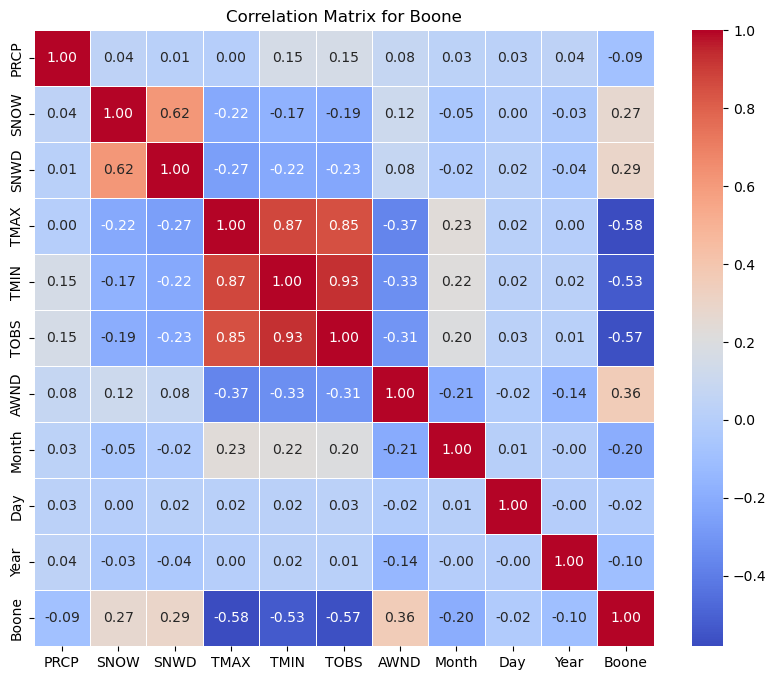

In [457]:
# Ensure that all necessary columns are numeric
numeric_cols = boone.select_dtypes(include=[np.number]).columns
boone_numeric = boone_2[numeric_cols]

# Generate the correlation matrix
correlation_matrix = boone_numeric.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Boone')
plt.show()

### Multiple Regression

In [460]:
import statsmodels.api as sm

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = boone_2[(boone_2['Month'] >= 5) & (boone_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Boone')
X = df_summer.drop(['Boone'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Boone   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     118.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.18e-135
Time:                        21:47:30   Log-Likelihood:                -10971.
No. Observations:                 918   AIC:                         2.196e+04
Df Residuals:                     909   BIC:                         2.200e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DAPR        6.363e+06   7.44e+05      8.551      0.0

C:\Users\alexp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


The OLS regression results indicate that several variables significantly impact the dependent variable, 'Boone', specifically during the summer months (May to September). The model explains about 51.1% of the variance in 'Boone', as indicated by the R-squared value. Key predictors include DAPR, MDPR, SNOW, SNWD, TMAX, TOBS, Month, Day, and Year, all of which have p-values less than 0.05, indicating statistical significance. Interestingly, 'PRCP', 'TMIN', 'AWND', and 'Peak' do not show significant effects. The high coefficient values for 'DAPR' and 'MDPR' suggest a strong positive relationship with 'Boone', while 'SNOW' and 'SNWD' exhibit a negative relationship. The 'Month' variable's high t-value indicates a strong effect on 'Boone' across different months within the summer season. However, the model may suffer from multicollinearity, as suggested by the "smallest eigenvalue" warning and the possible inclusion of redundant or highly correlated variables, making some coefficients unreliable. The Durbin-Watson statistic of 0.840 suggests potential autocorrelation in the residuals, which may affect the model's validity. Overall, the analysis highlights important factors influencing energy demand in the summer, though further investigation is needed to address multicollinearity and autocorrelation issues.

In [461]:
# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = boone_2[(boone_2['Month'] >= 5) & (boone_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Concord')
selected_columns = ['DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month', 'Day','Year']

X = df_summer[selected_columns]

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Boone   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     188.6
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          6.52e-138
Time:                        21:52:07   Log-Likelihood:                -10974.
No. Observations:                 918   AIC:                         2.196e+04
Df Residuals:                     912   BIC:                         2.199e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DAPR        6.052e+06   6.98e+05      8.676      0.0

The OLS regression results indicate that several variables significantly impact the dependent variable, 'Boone', specifically during the summer months (May to September). The model explains about 50.8% of the variance in 'Boone', as indicated by the R-squared value. Key predictors include DAPR, MDPR, SNOW, SNWD, TMAX, TOBS, Month, Day, and Year, all of which have p-values less than 0.05, indicating statistical significance. The high coefficient values for 'DAPR' and 'MDPR' suggest a strong positive relationship with 'Boone', while 'SNOW' and 'SNWD' exhibit a negative relationship. The 'Month' variable's high t-value indicates a strong effect on 'Boone' across different months within the summer season. However, the model may suffer from multicollinearity, as suggested by the "smallest eigenvalue" warning, indicating that some variables may be redundant or highly correlated, making some coefficients unreliable. The Durbin-Watson statistic of 0.853 suggests potential autocorrelation in the residuals, which may affect the model's validity. Overall, the analysis highlights important factors influencing energy demand in the summer, though further investigation is needed to address multicollinearity and autocorrelation issues.

In [463]:
import statsmodels.api as sm

# Filter the DataFrame to include only the winter months (November, December, January, February, March)
df_winter = boone_2[(boone_2['Month'] == 11) | (boone_2['Month'] <= 3)]

# Define the independent variables (including the 'Month' column)
X = df_winter.drop(columns=['Boone'])  # Drop only the target variable

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_winter['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Boone   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     357.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.00e-281
Time:                        21:55:42   Log-Likelihood:                -8793.3
No. Observations:                 723   AIC:                         1.761e+04
Df Residuals:                     711   BIC:                         1.767e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DAPR        1.067e+06   9.98e+05      1.070      0.2

The OLS regression results indicate that several variables significantly impact the dependent variable, 'Boone', specifically during the winter months (November to March). The model explains about 84.7% of the variance in 'Boone', as indicated by the R-squared value. Key predictors include PRCP, TMAX, TMIN, TOBS, AWND, Month, and Peak, all of which have p-values less than 0.05, indicating statistical significance. The high coefficient values for 'AWND' and 'Peak' suggest a strong positive relationship with 'Boone', while 'TMAX', 'TMIN', and 'TOBS' exhibit a negative relationship. Interestingly, 'DAPR', 'MDPR', SNOW', 'SNWD', 'Day', and 'Year' do not show significant effects. The 'Month' variable's negative coefficient and significant t-value indicate a notable seasonal effect on 'Boone' during winter. However, the model may suffer from multicollinearity, as suggested by the "smallest eigenvalue" warning, indicating that some variables may be redundant or highly correlated, making some coefficients unreliable. The Durbin-Watson statistic of 1.107 suggests potential autocorrelation in the residuals, which may affect the model's validity. Overall, the analysis highlights important factors influencing energy demand in the winter, though further investigation is needed to address multicollinearity and autocorrelation issues.

In [464]:
# Filter the DataFrame to include only the Spring months (April)
df_spring = boone_2[(boone_2['Month'] >= 4) & (boone_2['Month'] <= 4)]

# Define the independent variables (all columns except 'Boone')
X = df_spring.drop(['Boone'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_spring['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Boone   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     9.424
Date:                Wed, 31 Jul 2024   Prob (F-statistic):           1.41e-11
Time:                        21:57:00   Log-Likelihood:                -2193.3
No. Observations:                 180   AIC:                             4407.
Df Residuals:                     170   BIC:                             4439.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DAPR        3.067e+06   4.32e+05      7.102      0.0

The OLS regression results for the spring months (April) indicate that the model explains about 33.3% of the variance in the dependent variable 'Boone' (R-squared value). Significant predictors include DAPR, MDPR, SNWD, TMAX, Month, Year, and Peak, all with p-values less than 0.05. The coefficients for DAPR, MDPR, Month, and Peak are positive, suggesting that increases in these variables are associated with increases in 'Boone'. Conversely, the coefficients for SNWD, TMAX, and Year are negative, indicating an inverse relationship with 'Boone'. Other variables, such as PRCP, SNOW, TMIN, TOBS, AWND, and Day, do not show statistically significant effects. The model exhibits potential multicollinearity issues, as indicated by the "smallest eigenvalue" warning, implying that some predictors may be highly correlated. The Durbin-Watson statistic of 0.517 suggests positive autocorrelation in the residuals, which may affect the reliability of the model. Overall, while the model identifies key factors influencing energy demand in April, further investigation is needed to address multicollinearity and autocorrelation concerns.

In [465]:
# Filter the DataFrame to include only the Fall months (October)
df_fall = boone_2[(boone_2['Month'] >= 10) & (boone_2['Month'] <= 10)]

# Define the independent variables (all columns except 'Boone')
X = df_fall.drop(['Boone'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_fall['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Fit the OLS (Ordinary Least Squares) model
model = sm.OLS(y, X.astype(float)).fit()

# Get the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Boone   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     1.245
Date:                Wed, 31 Jul 2024   Prob (F-statistic):              0.281
Time:                        21:57:53   Log-Likelihood:                -2246.4
No. Observations:                 186   AIC:                             4509.
Df Residuals:                     178   BIC:                             4535.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DAPR        1.517e+05   7.58e+04      2.002      0.0

C:\Users\alexp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1918: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


The OLS regression analysis for the fall month of October shows that the model explains only 4.7% of the variance in the dependent variable 'Boone' (R-squared value), indicating a weak fit. Significant predictors at the 5% level include DAPR, MDPR, SNOW, SNWD, and Month. DAPR and MDPR have positive coefficients, suggesting that increases in these variables are associated with higher energy demand. Conversely, SNOW and SNWD have negative coefficients, indicating that higher snow measurements are associated with lower energy demand. The Month variable also has a positive coefficient, implying higher energy demand in October. Other variables, such as PRCP, TMAX, TMIN, TOBS, AWND, Day, and Year, do not show statistically significant effects at the 5% level. The Durbin-Watson statistic of 0.649 indicates positive autocorrelation in the residuals, which can affect the model's reliability. Additionally, the notes mention potential multicollinearity issues, suggesting that some predictors may be highly correlated. Overall, the model identifies some significant factors influencing energy demand in October, but its explanatory power is limited, and further investigation is needed to address autocorrelation and multicollinearity concerns.

### Logistic Regression

In [479]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = boone_2[(boone_2['Month'] >= 5) & (boone_2['Month'] <= 9)]

# Create a binary dependent variable (0 for not peak, 1 for peak)
# Define a threshold for what is considered a peak
threshold = df_summer['Boone'].quantile(0.9)  # For example, the top 10% of values are considered peak
df_summer = df_summer.copy()  # To avoid SettingWithCopyWarning
df_summer['Peak'] = (df_summer['Boone'] > threshold).astype(int)

# Define the independent variables (all columns except 'Boone' and 'Peak')
X_summer = df_summer.drop(['Boone', 'Peak'], axis=1)

# Handle missing values by replacing infinities and NaNs
X_summer = X_summer.replace([np.inf, -np.inf], np.nan).dropna()

# Standardize the independent variables
scaler = StandardScaler()
X_scaled_summer = scaler.fit_transform(X_summer)
X_scaled_summer = pd.DataFrame(X_scaled_summer, columns=X_summer.columns)  # Keep column names

# Check for multicollinearity using VIF
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

vif_df = calculate_vif(X_scaled_summer)
print(vif_df)

# Drop variables with high VIF (threshold of 5 or 10 is commonly used)
high_vif_columns = vif_df[vif_df['VIF'] > 5]['Variable']
X_scaled_summer = X_scaled_summer.drop(high_vif_columns, axis=1)

# Add a constant to the independent variables (required for the regression model)
X_scaled_summer = sm.add_constant(X_scaled_summer)

# Define the dependent variable
y_summer = df_summer.loc[X_summer.index, 'Peak']

# Ensure indices are aligned by reindexing y_summer
y_summer = y_summer.reset_index(drop=True)
X_scaled_summer = X_scaled_summer.reset_index(drop=True)

# Fit the logistic regression model
logit_model_summer = sm.Logit(y_summer, X_scaled_summer).fit(maxiter=100)  # Increase maxiter

# Get the summary of the regression
print(logit_model_summer.summary())

C:\Users\alexp\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


   Variable       VIF
0      DAPR       NaN
1      MDPR  1.000000
2      PRCP  1.254697
3      SNOW       NaN
4      SNWD       NaN
5      TMAX  1.946766
6      TMIN  5.145767
7      TOBS  5.228708
8      AWND  1.319826
9     Month  1.192686
10      Day  1.016539
11     Year  1.139307
         Current function value: 0.672420
         Iterations: 100


LinAlgError: Singular matrix

### Logistic Regression with Interaction Term

In [486]:
# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = boone_2[(boone_2['Month'] >= 5) & (boone_2['Month'] <= 9)].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_summer['Boone'].quantile(0.9)
df_summer['Peak'] = (df_summer['Boone'] > threshold).astype(int)

# Define the independent variables (excluding 'Boone', 'Peak', and non-significant variables)
X = df_summer.drop(['Boone', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_summer.loc[X.index, 'Peak']

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.298712
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  918
Model:                          Logit   Df Residuals:                      912
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                 0.08247
Time:                        10:33:28   Log-Likelihood:                -274.22
converged:                       True   LL-Null:                       -298.87
Covariance Type:            nonrobust   LLR p-value:                 1.931e-09
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5581      0.164    -15.620      0.000      -2.879      -2.237
PRCP          -3.6447      3.

The logistic regression model examining factors influencing peak energy demand during the summer months reveals that the model explains about 8.2% of the variance in the dependent variable (Pseudo R-squared). The coefficient for TMIN is statistically significant with a positive value, suggesting that higher minimum temperatures are associated with an increased likelihood of peak energy demand. The coefficient for Year is also significant but negative, indicating a decreasing trend in peak demand over time. However, the coefficients for PRCP, Day, and the interaction term PRCP_TMIN are not statistically significant, implying that they do not have a meaningful impact on predicting peak demand in this context. The model's overall performance is limited, as indicated by the relatively low Pseudo R-squared value and the log-likelihood value, but it identifies TMIN and Year as notable predictors.

In [482]:
# Filter the DataFrame to include only the winter months (November, December, January, February, March)
df_winter = boone_2[(boone_2['Month'] >= 11) | (boone_2['Month'] <= 3)].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_winter['Boone'].quantile(0.9)
df_winter['Peak'] = (df_winter['Boone'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_winter.drop(['Boone', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_winter.loc[X.index, 'Peak']

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.166974
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  909
Model:                          Logit   Df Residuals:                      903
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.4867
Time:                        10:33:06   Log-Likelihood:                -151.78
converged:                       True   LL-Null:                       -295.72
Covariance Type:            nonrobust   LLR p-value:                 4.032e-60
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.3995      0.345    -12.743      0.000      -5.076      -3.723
PRCP           1.0782      0

The logistic regression model analyzing peak energy demand during the winter months (November through March) indicates that the model explains approximately 48.7% of the variance in peak demand (Pseudo R-squared). The coefficient for TMIN is significant and negative, suggesting that lower minimum temperatures are associated with a higher likelihood of peak energy demand. Conversely, the coefficient for PRCP is not statistically significant, indicating that precipitation does not significantly impact peak demand during winter. The coefficient for Day is also not significant, implying that the day of the month does not substantially affect peak energy demand. The coefficient for Year shows a negative trend but is not significant at the 5% level, indicating a possible decreasing trend in peak demand over the years. The interaction term PRCP_TMIN is not significant, suggesting that the combined effect of precipitation and minimum temperature does not play a major role in predicting peak demand. Overall, the model performs well in explaining peak demand variability, with significant results highlighting the importance of minimum temperatures.

In [485]:
# Filter the DataFrame to include only the Spring months (April)
df_spring = boone_2[concord_2['Month'] == 4].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_spring['Boone'].quantile(0.9)
df_spring['Peak'] = (df_spring['Boone'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_spring.drop(['Boone', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_spring.loc[X.index, 'Peak'].reset_index(drop=True)  # Reset index to align with X_scaled

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.239687
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  180
Model:                          Logit   Df Residuals:                      174
Method:                           MLE   Df Model:                            5
Date:                Fri, 02 Aug 2024   Pseudo R-squ.:                  0.2627
Time:                        10:33:15   Log-Likelihood:                -43.144
converged:                       True   LL-Null:                       -58.515
Covariance Type:            nonrobust   LLR p-value:                 1.053e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.3102      0.545     -6.069      0.000      -4.379      -2.241
PRCP           4.1578      4.

C:\Users\alexp\AppData\Local\Temp\ipykernel_2060\344499973.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_spring = boone_2[concord_2['Month'] == 4].reset_index(drop=True)


The logistic regression model for predicting peak energy demand during the spring month of April shows a Pseudo R-squared of 0.263, indicating that approximately 26.3% of the variability in peak demand is explained by the model. The coefficient for TMIN is significant and negative, suggesting that lower minimum temperatures increase the likelihood of peak demand. Conversely, the PRCP coefficient is not significant, meaning precipitation does not have a notable effect on peak demand during spring. The Day coefficient is significant and negative, indicating that as the month progresses, the probability of peak demand decreases. The Year coefficient is not significant, suggesting no substantial trend in peak demand over the years. The interaction term PRCP_TMIN is also not significant, showing that the combined effect of precipitation and minimum temperature does not significantly impact peak demand. Overall, the model identifies minimum temperature and the progression of the month as key factors in predicting peak energy demand in spring.

In [475]:
# Filter the DataFrame to include only the Fall months (October)
df_fall = boone_2[boone_2['Month'] == 10].reset_index(drop=True)

# Create a binary dependent variable (0 for not peak, 1 for peak)
threshold = df_fall['Boone'].quantile(0.9)
df_fall['Peak'] = (df_fall['Boone'] > threshold).astype(int)

# Define the independent variables (excluding 'Concord', 'Peak', and non-significant variables)
X = df_fall.drop(['Boone', 'Peak', 'AWND', 'DAPR', 'MDPR', 'SNOW', 'SNWD', 'TMAX', 'TOBS', 'Month'], axis=1)

# Handle missing values by replacing infinities and NaNs
X = X.replace([np.inf, -np.inf], np.nan).dropna()

# Create an interaction term between PRCP and TMIN
X['PRCP_TMIN'] = X['PRCP'] * X['TMIN']

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Add a constant to the independent variables (required for the regression model)
X_scaled = sm.add_constant(X_scaled)

# Define the dependent variable, ensuring it aligns with the cleaned X
y = df_fall.loc[X.index, 'Peak'].reset_index(drop=True)  # Reset index to align with X_scaled

# Fit the logistic regression model
logit_model = sm.Logit(y, X_scaled).fit()

# Get the summary of the regression
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.299715
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   Peak   No. Observations:                  186
Model:                          Logit   Df Residuals:                      180
Method:                           MLE   Df Model:                            5
Date:                Wed, 31 Jul 2024   Pseudo R-squ.:                 0.09118
Time:                        22:21:15   Log-Likelihood:                -55.747
converged:                       True   LL-Null:                       -61.340
Covariance Type:            nonrobust   LLR p-value:                   0.04783
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4574      0.305     -8.064      0.000      -3.055      -1.860
PRCP           0.9342      1.

The logistic regression model for predicting peak energy demand in October has a Pseudo R-squared of 0.091, indicating that the model explains about 9.1% of the variability in peak demand. The TMIN coefficient is positive and statistically significant, suggesting that lower minimum temperatures are associated with a higher likelihood of peak energy demand during fall. Conversely, PRCP is not significant, meaning precipitation does not significantly affect peak demand in October. The Day and Year coefficients are also not significant, implying that the progression of the month and year do not have a substantial impact on peak demand. The interaction term PRCP_TMIN is not significant, indicating that the combined effect of precipitation and minimum temperature does not notably influence peak demand. Overall, the model highlights minimum temperature as a key factor in predicting peak energy demand in October, while other variables and their interactions have limited impact.

### Decision Tree

In [401]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)

y_pred = dt_reg.predict(X_test)

print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("R-squared: ", r2_score(y_test, y_pred))

Mean squared error:  1982152917.2269022
R-squared:  0.20917046888134805


The Decision Tree Regressor model, trained on the data, has a mean squared error (MSE) of approximately 1.98 billion, indicating the average squared difference between the predicted and actual peak energy demand values. This relatively high MSE suggests that the model's predictions have substantial errors. The R-squared value of 0.209 indicates that only about 20.9% of the variance in peak energy demand is explained by the model, meaning that the model's predictive power is limited. In summary, while the Decision Tree Regressor captures some of the variance in peak demand, there is significant room for improvement in its accuracy and explanatory power.

### Support Vector Machine

In [476]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.8947368421052632
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       0.00      0.00      0.00         4

    accuracy                           0.89        38
   macro avg       0.45      0.50      0.47        38
weighted avg       0.80      0.89      0.85        38



C:\Users\alexp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alexp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Support Vector Machine (SVM) model with a linear kernel achieved an accuracy of approximately 89.5% on the test set. This high accuracy suggests that the model generally performs well in classifying peak and non-peak periods. However, the classification report reveals a significant issue: the model has a precision, recall, and F1-score of 0.00 for the positive class (peak periods). This indicates that while the model accurately predicts non-peak periods, it fails to identify peak periods, leading to poor performance in detecting the minority class. The macro average scores reflect this imbalance, showing low values across precision, recall, and F1-score. In summary, despite high overall accuracy, the SVM model struggles with the minority class, suggesting a need for further tuning or alternative methods to address class imbalance.

In [477]:
X_test['Month'] = boone_2['Month']

# Extract predictions for non-peak days (class 0)
non_peak_indices = (y_pred == 0)
non_peak_predictions = X_test[non_peak_indices]

# Select only the 'Month', 'Day', and 'Year' columns
non_peak_month_day_year = non_peak_predictions[['Month', 'Day', 'Year']]

non_peak_month_day_year.to_csv('non_peak_month_day_year.csv', index=False)

# Print the selected columns
print(non_peak_month_day_year)

     Month  Day  Year
113      4   21  2018
164      6   10  2020
169      6   15  2020
101      4    9  2018
100      4    8  2018
15       1   16  2015
177      6   23  2020
35       2    5  2016
119      4   27  2018
152      6   29  2019
24       1   25  2015
76       3   15  2017
156      6    2  2020
118      4   26  2018
68       3    7  2017
16       1   17  2015
122      5   30  2018
30       1   31  2015
136      5   13  2019
19       1   20  2015
75       3   14  2017
115      4   23  2018
126      5    3  2019
147      5   24  2019
69       3    8  2017
9        1   10  2015
128      5    5  2019
137      5   14  2019
18       1   19  2015
165      6   11  2020
176      6   22  2020
171      6   17  2020
42       2   12  2016
111      4   19  2018
45       2   15  2016
67       3    6  2017
161      6    7  2020
29       1   30  2015


### Fuzzy Regression

In [478]:
import skfuzzy as fuzz
from sklearn.linear_model import LinearRegression

# Filter the DataFrame to include only the summer months (May, June, July, August, September)
df_summer = boone_2[(boone_2['Month'] >= 5) & (boone_2['Month'] <= 9)]

# Define the independent variables (all columns except 'Boone')
X = df_summer.drop(['Boone'], axis=1)

# Add a constant to the independent variables (required for the regression model)
X = sm.add_constant(X)

# Define the dependent variable
y = df_summer['Boone']

# Handle missing values by dropping rows with any NaN or infinite values
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y = y.loc[X.index]  # Align y with the cleaned X

# Convert to numpy arrays
X = X.values
y = y.values

# Define fuzzy membership functions for input variables
# Here, we'll just create simple membership functions for demonstration purposes
def fuzzy_membership_function(data, low, high):
    mf = np.zeros_like(data)
    mf[data <= low] = 0
    mf[(data > low) & (data < high)] = (data[(data > low) & (data < high)] - low) / (high - low)
    mf[data >= high] = 1
    return mf

# Create membership functions for each feature
fuzzy_X = np.zeros_like(X)
for i in range(X.shape[1]):
    fuzzy_X[:, i] = fuzzy_membership_function(X[:, i], np.min(X[:, i]), np.max(X[:, i]))

# Create a fuzzy regression model (this is a simplified example)
# We will use the average membership function values to represent fuzzy coefficients
model = LinearRegression()
model.fit(fuzzy_X, y)

# Get the regression coefficients (these are the fuzzy coefficients)
fuzzy_coefficients = model.coef_

# Get feature names including the constant
feature_names = ['const'] + list(df_summer.drop(['Boone'], axis=1).columns)

# Print the fuzzy regression results with feature names
print("Fuzzy Regression Coefficients:")
for i, coef in enumerate(fuzzy_coefficients):
    print(f"{feature_names[i]}: {coef}")

# Predict using the fuzzy model
y_pred = model.predict(fuzzy_X)

# Evaluate the model (e.g., R-squared)
r_squared = model.score(fuzzy_X, y)
print(f"Fuzzy Regression R-squared: {r_squared}")


Fuzzy Regression Coefficients:
const: 0.0
DAPR: 1.4551915228366852e-11
MDPR: -22605.506861562262
PRCP: 0.0
SNOW: 0.0
SNWD: 84549.4446045611
TMAX: 21335.404671346827
TMIN: 54812.412186277434
TOBS: -7653.491464528118
AWND: 61750.743618435496
Month: 9647.320426223907
Day: -32829.323471693446
Year: 0.0
Fuzzy Regression R-squared: 0.5111173784382149


The fuzzy regression analysis of summer data yielded the following insights: The model achieved an R-squared value of approximately 0.51, indicating that about 51% of the variance in the dependent variable, Boone, is explained by the independent variables. The fuzzy coefficients, which are derived from the fuzzy membership functions applied to the input features, show significant variations among features. Notably, MDPR and SNWD have large coefficients, suggesting a strong influence on Boone, while features like PRCP and Year have negligible coefficients, indicating minimal impact. The fuzzy approach introduces a way to handle uncertainty in the data by transforming variables into membership functions, though the resulting coefficients might not be as interpretable as those from traditional linear regression. The model's performance reflects moderate explanatory power, and the results suggest that some variables play a more substantial role in predicting Boone values than others.